# **CREDIT CARD APPROVAL PREDICTION**
-----------

**Authors** : [Leah Katiwa](https://github.com/leah-katiwa) , [Ronald Nyagaka](https://github.com/Ronaldonyagaka), [Maureen Kitang'a](https://github.com/ndungek
), [Cliff Shitote](https://github.com/CliffShitote), [Beatrice Kirui](https://github.com/beatrice-kirui), [Paul Kamau](https://github.com/kamaupaul)

# 1. Business Understanding

## 1.1 Introduction

In the financial industry, credit score cards are extensively utilized to evaluate the risk associated with issuing credit cards to applicants. These cards utilize historical data to anticipate potential defaults and credit card borrowing patterns, enabling banks to make well-informed decisions regarding card approval. Nevertheless, the reliability of traditional approaches, such as assessing financial metrics like debt-to-income ratios and utilization ratios can be impacted by economic fluctuations. To enhance credit scoring, alternative methods like machine learning algorithms have been introduced. Although these methods enhance prediction accuracy, they often lack transparency, creating challenges in providing clear explanations for acceptance or rejection decisions to both customers and regulatory bodies.

## 1.2 Problem Statement

The existing credit scoring methods rely on historical data and traditional financial metrics like debt-to-income ratios, face limitations in accurately predicting creditworthiness due to economic fluctuations. The introduction of machine learning algorithms has shown promise in enhancing credit scoring accuracy but lacks transparency in explaining acceptance or rejection decisions. As a result, there is a need to develop a credit scoring model that leverages both historical data and advanced machine learning techniques to improve prediction capabilities while providing transparent and interpretable results for customers and regulators. The objective is to create a reliable and transparent credit scoring system that effectively assesses the risk of issuing credit cards based on applicants' personal information, contributing to informed decision-making by financial institutions and ensuring fair treatment of applicants.

The end user is the bank that will use this deployment in conjunction with their own to complement the credit scoring system

## 1.3 Project Objectives

1. Develop a credit scoring model that incorporates personal and social factors and machine learning algorithms to enhance the accuracy of creditworthiness predictions.
2. Improve transparency in credit scoring by utilizing interpretable machine learning techniques, allowing for clear explanations of acceptance or rejection decisions to customers and regulatory bodies.
3. Mitigate the impact of economic fluctuations on credit scoring models by incorporating dynamic factors and adapting the model to changing economic conditions.
4. Optimize the balance between prediction accuracy and interpretability to ensure a fair and reliable credit scoring system for both applicants and financial institutions.

## 1.4 Success Metric
The project's success criterion is to achieve a model accuracy level of at least 80% in order to identify the best-performing model.

# 2. Data Understanding
> This phase is broken down into four tasks together with its projected outcome or output in detail:
> - Collect Initial Data
> - Describe Data
> - Explore Data
> - Verify Data Quality

The data for this project was sourced from [Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) . This data consists of information of past application and credits data.


In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.feature_selection import  RFE, RFECV
from sklearn.model_selection import  KFold
from sklearn.model_selection import  learning_curve

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import time
import joblib    
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install shap

     ------------------------------------ 461.5/461.5 kB 803.0 kB/s eta 0:00:00


## 2.1 Applications Dataset
>>> [Data Description](./data/Data%20Description.txt)

In [3]:
#loading the dataset
application = pd.read_csv("./data/application_record.csv")

#previewing the first few rows
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [4]:
class DatasetAnalyzer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # function to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out
    
    # function to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out
    
    # function to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out


In [5]:
analyzer = DatasetAnalyzer(application)

# lets view the shape of the data
analyzer.shape()

The DataFrame has:
	* 438557 rows
	* 18 columns 



In [6]:
# lets print summary information on the dataset
analyzer.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
# getting a description of our data set
analyzer.data_describe().T

count          mean            std        min        25%  \
ID                438557.0  6.022176e+06  571637.023257  5008804.0  5609375.0   
CNT_CHILDREN      438557.0  4.273903e-01       0.724882        0.0        0.0   
AMT_INCOME_TOTAL  438557.0  1.875243e+05  110086.853066    26100.0   121500.0   
DAYS_BIRTH        438557.0 -1.599790e+04    4185.030007   -25201.0   -19483.0   
DAYS_EMPLOYED     438557.0  6.056368e+04  138767.799647   -17531.0    -3103.0   
FLAG_MOBIL        438557.0  1.000000e+00       0.000000        1.0        1.0   
FLAG_WORK_PHONE   438557.0  2.061328e-01       0.404527        0.0        0.0   
FLAG_PHONE        438557.0  2.877710e-01       0.452724        0.0        0.0   
FLAG_EMAIL        438557.0  1.082071e-01       0.310642        0.0        0.0   
CNT_FAM_MEMBERS   438557.0  2.194465e+00       0.897207        1.0        2.0   

                        50%        75%        max  
ID                6047745.0  6456971.0  7999952.0  
CNT_CHILDREN            0.0        1.0       19.0  
AMT_INCOME_TOTAL   160780.5   225000.0  6750000.0  
DAYS_BIRTH         -15630.0   -12514.0    -7489.0  
DAYS_EMPLOYED       -1467.0     -371.0   365243.0  
FLAG_MOBIL              1.0        1.0        1.0  
FLAG_WORK_PHONE         0.0        0.0        1.0  
FLAG_PHONE              0.0        1.0        1.0  
FLAG_EMAIL              0.0        0.0        1.0  
CNT_FAM_MEMBERS         2.0        3.0       20.0

## 2.2 Credits Dataset
>>> [Data Description](./data/Data%20Description.txt)

In [8]:
# loading the dataset
credits = pd.read_csv("./data/credit_record.csv")

#previewing the first few rows
credits.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [9]:
analyzer = DatasetAnalyzer(credits)

# lets view the shape of the data
# Checking the shape of dataset
analyzer.shape()

The DataFrame has:
	* 1048575 rows
	* 3 columns 



In [10]:
# lets print summary information on the dataset
analyzer.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None 



In [11]:
# getting a description of our data set
analyzer.data_describe().T

count          mean           std        min        25%  \
ID              1048575.0  5.068286e+06  46150.578505  5001711.0  5023644.0   
MONTHS_BALANCE  1048575.0 -1.913700e+01     14.023498      -60.0      -29.0   

                      50%        75%        max  
ID              5062104.0  5113856.0  5150487.0  
MONTHS_BALANCE      -17.0       -7.0        0.0

## 2.3 Merged Dataset

In [12]:
## merging our two datasets
new_df = pd.merge(application, credits, on='ID', how='inner')

#previewing the first few rows
new_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0               0   
1           0           0             NaN              2.0              -1   
2           0           0             NaN              2.0              -2   
3           0           0             NaN              2.0              -3   
4           0           0             NaN              2.0              -4   

  STATUS  
0      C  
1      C  
2      C  
3      C  
4      C

In [13]:
analyzer = DatasetAnalyzer(new_df)

analyzer.shape()

The DataFrame has:
	* 777715 rows
	* 20 columns 



In [14]:
analyzer.data_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [15]:
analyzer.data_describe().T

count          mean            std        min        25%  \
ID                777715.0  5.078743e+06   41804.424817  5008804.0  5044568.5   
CNT_CHILDREN      777715.0  4.280823e-01       0.745755        0.0        0.0   
AMT_INCOME_TOTAL  777715.0  1.885348e+05  101622.450076    27000.0   121500.0   
DAYS_BIRTH        777715.0 -1.612494e+04    4104.304018   -25152.0   -19453.0   
DAYS_EMPLOYED     777715.0  5.777583e+04  136471.735391   -15713.0    -3292.0   
FLAG_MOBIL        777715.0  1.000000e+00       0.000000        1.0        1.0   
FLAG_WORK_PHONE   777715.0  2.318176e-01       0.421993        0.0        0.0   
FLAG_PHONE        777715.0  3.009650e-01       0.458678        0.0        0.0   
FLAG_EMAIL        777715.0  9.167497e-02       0.288567        0.0        0.0   
CNT_FAM_MEMBERS   777715.0  2.208837e+00       0.907380        1.0        2.0   
MONTHS_BALANCE    777715.0 -1.937356e+01      14.082208      -60.0      -29.0   

                        50%        75%        max  
ID                5069530.0  5115551.0  5150487.0  
CNT_CHILDREN            0.0        1.0       19.0  
AMT_INCOME_TOTAL   162000.0   225000.0  1575000.0  
DAYS_BIRTH         -15760.0   -12716.0    -7489.0  
DAYS_EMPLOYED       -1682.0     -431.0   365243.0  
FLAG_MOBIL              1.0        1.0        1.0  
FLAG_WORK_PHONE         0.0        0.0        1.0  
FLAG_PHONE              0.0        1.0        1.0  
FLAG_EMAIL              0.0        0.0        1.0  
CNT_FAM_MEMBERS         2.0        3.0       20.0  
MONTHS_BALANCE        -17.0       -8.0        0.0

## 3. Data Preparation
> This phase, which is often referred to as “data munging”, prepares the final data set(s) for modeling. It has the following tasks:
> - Clean Data
> - EDA
> - Data Preprocessing


## 3.1 Clean Data
> In this section, we will be looking at the missing values, duplicate records in the dataset as well as the outliers in the dataset.

### 3.1.1 Completeness
> We will be considering the completeness of the dataset in this section. In this section, we will be looking at the missing values in the dataset.

In [16]:
def missing_values(df):
    """
    Returns the columns with missing values along with the number and percentage of missing values.
    
    Args:
        df (pandas.DataFrame): The DataFrame to analyze.
    
    Returns:
        pandas.DataFrame: A DataFrame with columns 'Column Name', 'Missing Values', and 'Missing Percentage'.
    """
    total_missing = df.isnull().sum()
    percent_missing = (total_missing / len(df)) * 100
    missing_data = pd.DataFrame({
        'Column Name': total_missing.index,
        'Missing Values': total_missing.values,
        'Missing Percentage': percent_missing.values
    })
    columns_with_missing_values = missing_data[missing_data['Missing Values'] > 0]
    return columns_with_missing_values


In [17]:
missing_values(new_df)

Column Name  Missing Values  Missing Percentage
16  OCCUPATION_TYPE          240048           30.865806

The `OCCUPATION_TYPE` column with missing values exhibits a diverse range of income types.
Since the missing values account for approximately 31 percent of the column, we cannot make assumptions about the income types associated with these occupations.
Consequently, we will impute the NaN values in the column with the term **unspecified** to handle the missing data appropriately.

In [18]:
# replacing null values
new_df['OCCUPATION_TYPE'].fillna('unspecified', inplace =True)

### 3.1.2 Uniformity
> In this section, we will be looking at the uniformity of the data. Uniformity refers to the consistency of the data with respect to the formatting, labelling. We will be looking at the following:
> - Labelling
> - Formatting

#### 3.1.2.1 Labelling
> Labelling refers to the consistency of the data with respect to the labelling of the data. We will be looking at the following:
> - Are the columns small case?
> - Are there any spaces?
> - Are they interpretable?

We will be writing a function that will rename the columns in the dataset

In [19]:
def rename_columns(df, column_mapping):
    """
    Renames columns in a DataFrame.
    
    Args:
        df (pandas.DataFrame): The DataFrame whose columns need to be renamed.
        column_mapping (dict): A dictionary mapping current column names to new column names.
    
    Returns:
        pandas.DataFrame: The DataFrame with renamed columns.
    """
    df = df.rename(columns=column_mapping)
    return df

In [20]:
# Define a dictionary with column mappings
column_mapping = {
    'CODE_GENDER': 'Gender', 
    'FLAG_OWN_CAR': 'Own_Car', 
    'FLAG_OWN_REALTY':'Own_Property',
    'CNT_CHILDREN':'Num_Children',
    'AMT_INCOME_TOTAL':'Total_Income',
    'NAME_INCOME_TYPE':'Income_Type',
    'NAME_EDUCATION_TYPE':'Education_Level',
    'NAME_FAMILY_STATUS':'Family_Status',
    'NAME_HOUSING_TYPE':'Housing_Type',
    'DAYS_BIRTH':'age(days)',
    'DAYS_EMPLOYED':'Employment_Duration',
    'FLAG_WORK_PHONE':'Work_Phone',
    'FLAG_MOBIL':'Mobile',
    'FLAG_PHONE':'Phone',
    'FLAG_EMAIL':'Email',
    'OCCUPATION_TYPE':'Occupation',
    'CNT_FAM_MEMBERS':'Num_Family',
    'STATUS': 'Status',
    'MONTHS_BALANCE': 'Recorded_date(months)'
    
}

# Rename the columns in the DataFrame
new_df = rename_columns(new_df, column_mapping)

In [21]:
# listing the columns
new_df.columns

Index(['ID', 'Gender', 'Own_Car', 'Own_Property', 'Num_Children',
       'Total_Income', 'Income_Type', 'Education_Level', 'Family_Status',
       'Housing_Type', 'age(days)', 'Employment_Duration', 'Mobile',
       'Work_Phone', 'Phone', 'Email', 'Occupation', 'Num_Family',
       'Recorded_date(months)', 'Status'],
      dtype='object')

In [22]:
#Defining a function to split secondary
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

In [23]:
# Applying the function
new_df['Education_Level']=new_df['Education_Level'].apply(education)
new_df['Education_Level'].value_counts()

Secondary            524261
Higher education     213633
Incomplete higher     30329
Lower secondary        8655
Academic degree         837
Name: Education_Level, dtype: int64

In [24]:
# Confirming the change
new_df['Family_Status'].value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: Family_Status, dtype: int64

In [25]:
# Defining a function to split secondary
def marital_status(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x

In [26]:
# applying the function
new_df['Family_Status']= new_df['Family_Status'].apply(marital_status)

In [27]:
# confirming the changes 
new_df['Family_Status'].value_counts()

Married           546619
Single             94335
Civil marriage     60342
Separated          45255
Widow              31164
Name: Family_Status, dtype: int64

#### 3.1.2.2 Formatting
> The formatting of the data refers to the consistency of the data with respect to the datatypes of the columns.

In [28]:
#checking the datatypes of each column
print(new_df.dtypes)

ID                         int64
Gender                    object
Own_Car                   object
Own_Property              object
Num_Children               int64
Total_Income             float64
Income_Type               object
Education_Level           object
Family_Status             object
Housing_Type              object
age(days)                  int64
Employment_Duration        int64
Mobile                     int64
Work_Phone                 int64
Phone                      int64
Email                      int64
Occupation                object
Num_Family               float64
Recorded_date(months)      int64
Status                    object
dtype: object


 >`Num_family` has float datatype , so we shall try convert that into int type

In [29]:
# changing data type of Num_family
new_df['Num_Family'] = new_df['Num_Family'].astype('int64')

> The column `age(days)` shall be converted into `age(years)`

In [30]:
# changing age in days to age in years
new_df['age(years)'] = round(abs(new_df['age(days)'] / 365))

In [31]:
# changing employment duration into months instead of days
new_df['Employment_Duration'] = round(new_df['Employment_Duration']  / 365).astype('int64')

### 3.1.3 Validity
> In this section, we will be looking at the validity of the data. We will be looking at the following:
>  - Duplicated Data
>  - Outliers

#### 3.1.3.1 Dealing with duplicates

In [32]:
def check_duplicates(df):
    """
    Checks for duplicates in a DataFrame.
    
    Returns:
        bool: True if duplicates are found, False otherwise.
    """
    duplicates = df.duplicated().any()
    return duplicates

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Check for duplicates in the DataFrame
has_duplicates = check_duplicates(new_df)

# Print the result
if has_duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


#### 3.1.3.2 Dealing with Outliers
> Outliers are data points that significantly deviate from the majority of the data in a dataset. They are observations that lie at an abnormal distance from other observations, and they can have a substantial impact on statistical analyses and modeling.

> Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, natural variations, or genuine extreme values in the data.

In [33]:
def outliers(df, col):
    """
    This function visualises the outliers(numerical columns) and outputs boxplots
    """
    plt.figure(figsize=(10,2))
    sns.boxplot(x=col, data=df);

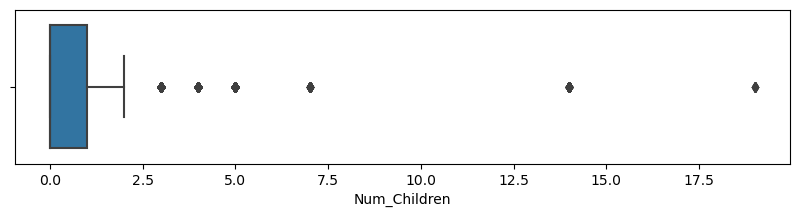

In [34]:
#Visualize the outliers in the 'Num_children' column
outliers(new_df,'Num_Children')

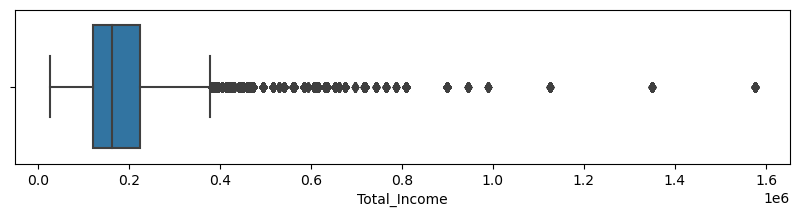

In [35]:
#Visualize the outliers in the 'Total_income' column
outliers(new_df,'Total_Income')

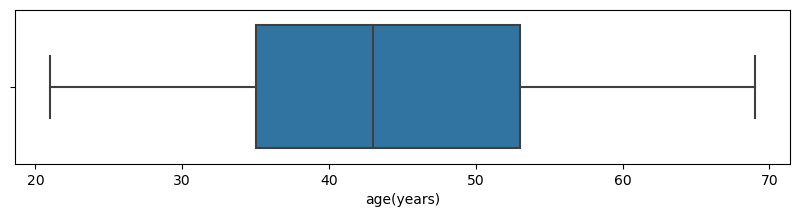

In [36]:
#Visualize the outliers in the 'Num_children' column
outliers(new_df,'age(years)')

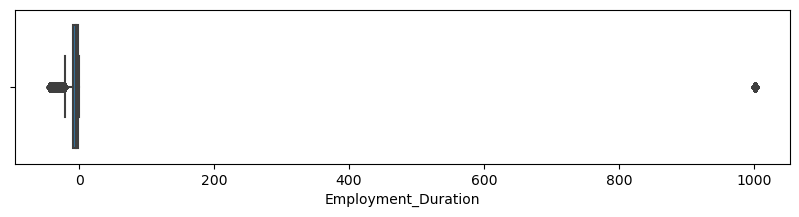

In [37]:
#Visualize the outliers in the 'employment_duration' column
outliers(new_df,'Employment_Duration')

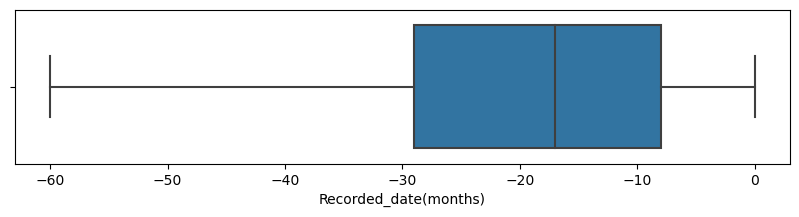

In [38]:
#Visualize the outliers in the 'Recorded_date(Months)' column
outliers(new_df,'Recorded_date(months)')

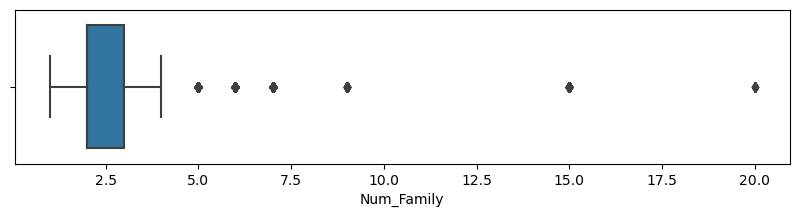

In [39]:
#Visualize the outliers in the 'Num_family' column
outliers(new_df,'Num_Family')

*** `Insights`***

Although the dataset contains outliers, we will proceed with exploratory data analysis (EDA) to gain deeper insights into the data. By conducting EDA, we aim to uncover patterns, relationships, and underlying trends that can help us understand the data better.

We are not going to drop the outliers in the columns Num_Children and Num_family since its hard to determine the number of children a family can have and the family size a client can have.Also for case of total income its dense to determine the total income of a client since the occupation differs from one client to another

## 3.2 Exploratory Data Analysis

>> In this section, we shall be exploring the columns in the dataset. We shall be performing the following

* Univariate Analysis

* Bivariate Analysis

* Multi-variate Analysis

### 3.2.1 Univariate Analysis
> In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights. 

In [40]:
#Creating a function to get the value count
def get_value_counts(df, id_col, cat_col):

    # Aggregate the data by ID and select the unique categorical value for each ID
    aggregated_df = df.groupby(id_col)[cat_col].unique().str[0]
    
    # Calculate the value counts
    value_counts = aggregated_df.value_counts()

    # Print the unique values and counts
    for value, count in value_counts.items():
        print(f'{value}: {count}')

    # Handle the case when there are no values
    if len(value_counts) == 0:
        data_type = df[cat_col].dtype
        print(f'{cat_col}: {data_type} (Length: {len(df)}, dtype: {data_type})')


In [41]:
#Creating a function to determine the categorical 
def plot_categorical_counts(df, id_col, cat_col, title):
    """
    Aggregates the categorical column based on the ID column and plots the counts.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        id_col (str): The name of the ID column.
        cat_col (str): The name of the categorical column.
        title (str): The title for the plot.
    """
    # Aggregate the data by ID and select the unique categorical value for each ID
    aggregated_df = df.groupby(id_col)[cat_col].unique().str[0]
    
    # Calculate the value counts and percentages
    value_counts = aggregated_df.value_counts()
    total = value_counts.sum()
    percentages = (value_counts / total) * 100
    
    # Plot the counts of the categorical column
    fig, ax = plt.subplots(figsize=(11, 5))
    value_counts.plot(kind='bar', ax=ax)
    
    # Set plot labels and title
    plt.xlabel(cat_col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(title, fontsize=14)
    
    # Print value counts and percentages on top of each bar
    for i, count in enumerate(value_counts):
        percentage = percentages[i]
        ax.text(i, count, f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)
    
    # Display the plot
    plt.show()

#### `3.2.1.1 Status`

C: 17950
X: 9669
0: 8456
1: 276
5: 76
2: 19
3: 6
4: 5
None


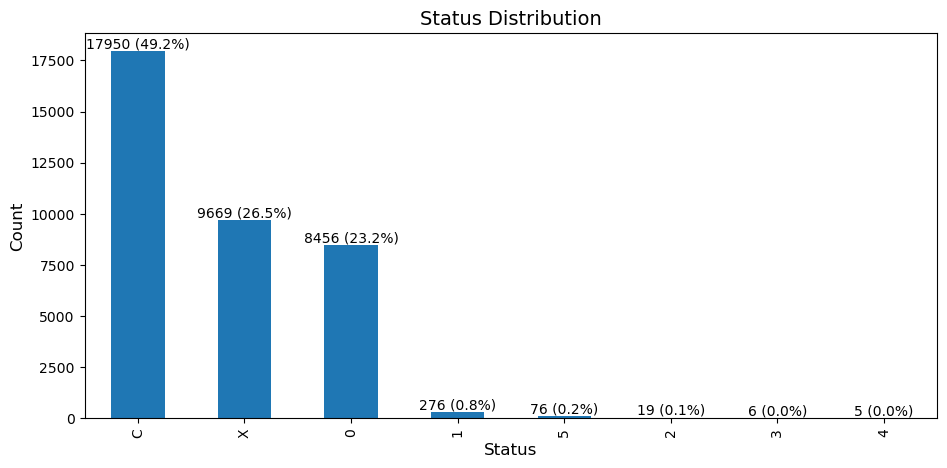

In [42]:
#checking for the 
print(get_value_counts(new_df, 'ID','Status'))
plot_categorical_counts(new_df, 'ID', 'Status', 'Status Distribution')

The value `C` appears the most frequent status, with a count of 17950, accounting for 49.2% of the total counts.

The next most common value is `X` with a count of 9669, representing 26.5% of the total.

The value `0` has a count of 8456, making up 23.2% of the total.

There are relatively fewer occurrences of the values "1" (276), "5" (76), "2" (19), "3" (6), and "4" (5), each representing a small percentage of the total count.

#### `3.2.1.2 Gender`

F: 24430
M: 12027
None


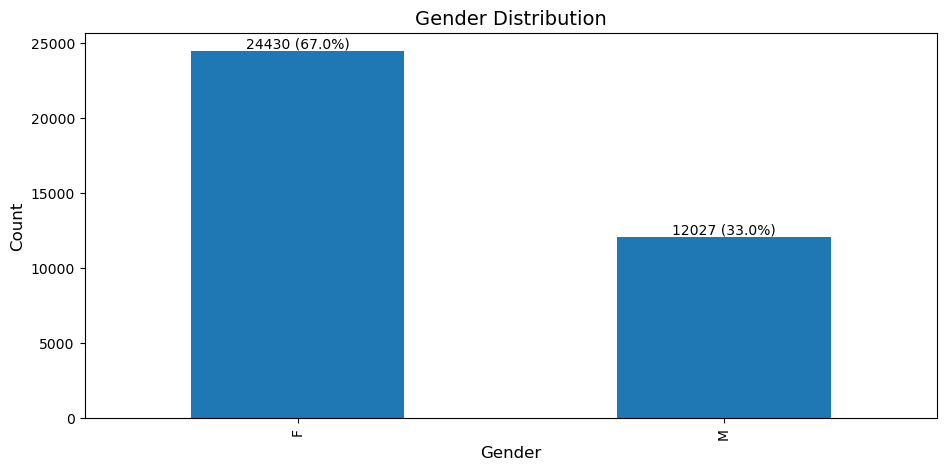

In [43]:
print(get_value_counts(new_df, 'ID','Gender'))
plot_categorical_counts(new_df, 'ID', 'Gender', 'Gender Distribution')

The value `"F" (Female)` appears more frequently with a count of 24430, accounting for approximately 67.05% of the total counts in the column.
The value `"M" (Male)` has a count of 12027, representing around 32.95% of the total counts

#### `3.1.2.3 Own_Car`

N: 22614
Y: 13843
None


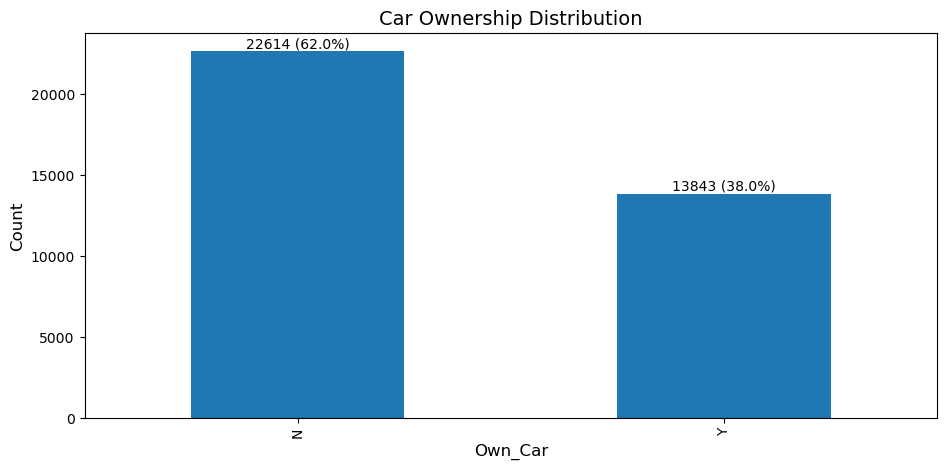

In [44]:
print(get_value_counts(new_df, 'ID','Own_Car'))
plot_categorical_counts(new_df, 'ID', 'Own_Car', 'Car Ownership Distribution')

The majority of individuals in the dataset 62% do not own a car, while approximately 38% of individuals own a car.

#### `3.1.2.4 Own_Property`

Y: 24506
N: 11951
None


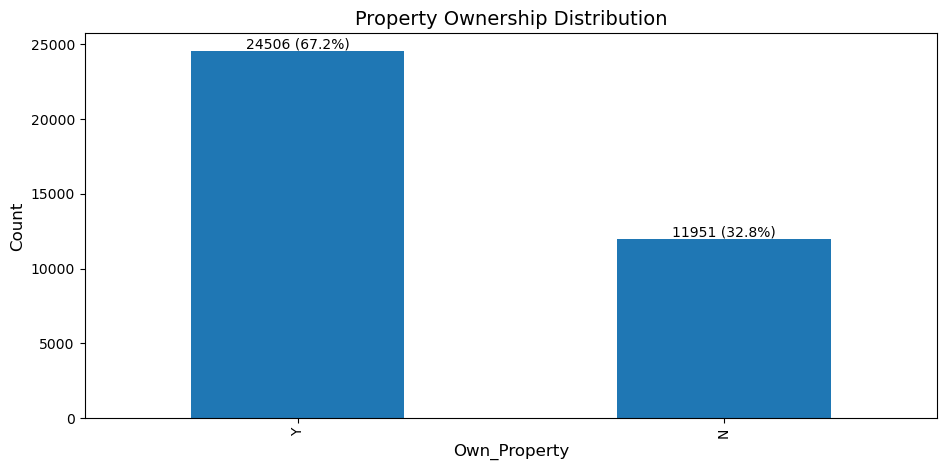

In [45]:
print(get_value_counts(new_df, 'ID','Own_Property'))
plot_categorical_counts(new_df, 'ID', 'Own_Property', 'Property Ownership Distribution')

 it can be observed that a larger proportion of individuals in the dataset (approximately 67%) own a property, while around 33% do not own any property.

In [46]:
def plot_categorical_data(df, id_col, cat_col, title):
    """
    Aggregates the categorical column based on the ID column and plots the counts horizontally with percentages at the end of each bar.
    """
    # Aggregate the data by ID and select the unique categorical value for each ID
    aggregated_df = df.groupby(id_col)[cat_col].unique().str[0]
    
    # Calculate the value counts and percentages
    value_counts = aggregated_df.value_counts()
    total = value_counts.sum()
    percentages = (value_counts / total) * 100
    
    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({cat_col: value_counts.index, 'Count': value_counts.values})
    
    # Sort the DataFrame based on count values in descending order
    plot_data = plot_data.sort_values('Count', ascending=True)
    
    # Plot the counts of the categorical column horizontally using Plotly
    fig = px.bar(plot_data, y=cat_col, x='Count', orientation='h', color='Count')
    
    # Set plot labels and title
    fig.update_layout(
        title=title,
        xaxis_title='Count',
        yaxis_title=cat_col
    )
    
    # Display the plot
    fig.show()

#### `3.2.1.5 Occupation`

In [47]:
print(get_value_counts(new_df,'ID','Occupation'))
plot_categorical_data(new_df,'ID', 'Occupation', 'Distribution of Occupation')

unspecified: 11323
Laborers: 6211
Core staff: 3591
Sales staff: 3485
Managers: 3012
Drivers: 2138
High skill tech staff: 1383
Accountants: 1241
Medicine staff: 1207
Cooking staff: 655
Security staff: 592
Cleaning staff: 551
Private service staff: 344
Low-skill Laborers: 175
Waiters/barmen staff: 174
Secretaries: 151
HR staff: 85
Realty agents: 79
IT staff: 60
None


The `Unspecified` category has a count of 11323, which represents approximately 30.95% of the total counts in the "Occupation" column.

The next most frequent occupations are `Laborers` with 6211 counts (16.97%), followed by `Core staff` with 3591 counts (9.82%).

Other significant occupations include `Sales staff` (3485 counts, 9.52%), `Managers` (3012 counts, 8.24%), and "Drivers" (2138 counts, 5.85%).

#### `3.2.1.6 Income_Type`

In [48]:
print(get_value_counts(new_df,'ID', 'Income_Type'))
plot_categorical_data(new_df,'ID', 'Income_Type', 'Distribution of Income Types')

Working: 18819
Commercial associate: 8490
Pensioner: 6152
State servant: 2985
Student: 11
None


`Working` has the highest count with 18,819 occurrences, representing approximately 51.32% of the total counts in the "Income Type" column.

`Commercial associate` has a count of 8,490, accounting for around 23.11% of the total counts.

`Pensioner` is the third most common category with a count of 6,152, making up approximately 16.76% of the total counts.

#### `3.2.1.7 Education_Level`

In [49]:
print(get_value_counts(new_df,'ID', 'Education_Level'))
plot_categorical_data(new_df,'ID','Education_Level', 'Distribution Education Levels')

Secondary: 24777
Higher education: 9864
Incomplete higher: 1410
Lower secondary: 374
Academic degree: 32
None


`Secondary` is the most common education type, with a count of 24,777. This category represents individuals who have completed secondary education or have a secondary special education. It accounts for approximately 66.17% of the total counts in the "Education Type" column.

`Higher education` is the second most common category, with a count of 9,864, making up around 26.28% of the total counts. This category includes individuals with a higher education degree.

`Academic degree` has the lowest count with 32 occurrences, indicating individuals who hold an academic degree. It contributes to a small portion of the total counts, approximately 0.09%.

#### `3.2.1.8 Housing_Type`

In [50]:
print(get_value_counts(new_df,'ID', 'Housing_Type'))
plot_categorical_data(new_df,'ID', 'Housing_Type', 'Distribution of Housing Types')

House / apartment: 32548
With parents: 1776
Municipal apartment: 1128
Rented apartment: 575
Office apartment: 262
Co-op apartment: 168
None


`House / apartment` is the most common housing type, with a count of 32,548. This category represents individuals who live in their own house or apartment. It accounts for approximately 91.29% of the total counts in the "Housing Type" column.

`With parents` has a count of 1,776, indicating individuals who live with their parents. It represents around 4.99% of the total counts.

`Municipal apartment` has a count of 1,128, accounting for about 3.17% of the total counts. This category includes individuals who reside in apartments owned by the municipality.

`Rented apartment` has a count of 575, representing approximately 1.62% of the total counts. It includes individuals who live in apartments that are rented.

#### `3.2.1.9 Family_Status`

In [51]:
print(get_value_counts(new_df,'ID', 'Family_Status'))
plot_categorical_data(new_df,'ID', 'Family_Status', 'Distribution of Family Status')

Married: 25048
Single: 4829
Civil marriage: 2945
Separated: 2103
Widow: 1532
None


`Married` is the most common family status, with a count of 25,048. This category represents individuals who are married. It accounts for approximately 70.34% of the total counts in the "Family Status" column.

`Single` has a count of 4,829, indicating individuals who are single and not currently married. It represents around 13.56% of the total counts.

`Civil marriage` has a count of 2,945, accounting for about 8.26% of the total counts. This category includes individuals who are in a civil partnership or civil marriage.

#### `3.2.1.10 Num_Children`

In [52]:
# print(get_value_counts(new_df,'ID','Num_Children'))
print(get_value_counts(new_df,'ID', 'Num_Children'))
plot_categorical_data(new_df,'ID', 'Num_Children', 'Distribution of Number of Children')

0: 25201
1: 7492
2: 3256
3: 419
4: 63
5: 20
14: 3
7: 2
19: 1
None


`0` has the highest count, with 25,201 occurrences. This category represents individuals who do not have any children. It accounts for approximately 67.03% of the total counts in the "Number of Children" column.

`1` has a count of 7,492, indicating individuals who have one child. It represents around 19.88% of the total counts.

`2` has a count of 3,256, accounting for about 8.64% of the total counts. This category includes individuals who have two children.

#### `3.2.1.11 Num_Family`

In [53]:
print(get_value_counts(new_df,'ID','Num_Family'))
plot_categorical_data(new_df,'ID', 'Num_Family', 'Distribution of Number of Family Members')

2: 19463
1: 6987
3: 6421
4: 3106
5: 397
6: 58
7: 19
15: 3
9: 2
20: 1
None


The majority of individuals (19,463) have 2 family members.
The second most common category is 1 family member, with 6,987 individuals.
There is a gradual decrease in the number of family members as the count increases.

#### `3.2.1.11 Age`

In [54]:
print(get_value_counts(new_df,'ID','age(years)'))
plot_categorical_data(new_df,'ID', 'age(years)', 'Distribution of Ages')

39.0: 1207
40.0: 1127
37.0: 1118
41.0: 1103
28.0: 1086
34.0: 1077
29.0: 1070
30.0: 1051
42.0: 1043
33.0: 1032
35.0: 1024
44.0: 1015
32.0: 990
38.0: 975
36.0: 972
43.0: 942
51.0: 897
45.0: 893
49.0: 879
52.0: 873
31.0: 867
47.0: 854
27.0: 846
48.0: 832
46.0: 809
57.0: 797
59.0: 797
60.0: 789
54.0: 786
55.0: 784
50.0: 754
56.0: 751
58.0: 741
61.0: 725
53.0: 724
62.0: 599
64.0: 589
63.0: 552
26.0: 522
65.0: 455
25.0: 449
66.0: 258
23.0: 223
24.0: 221
67.0: 207
68.0: 85
22.0: 50
69.0: 9
21.0: 8
None


The age of 39.0 has the highest count, with 1,207 individuals.
The ages 40.0, 37.0, and 41.0 follow closely with high counts as well.
The distribution of ages shows some variation, but it appears to have multiple peaks rather than a smooth distribution.

#### `3.2.1.13 Total_Income` 

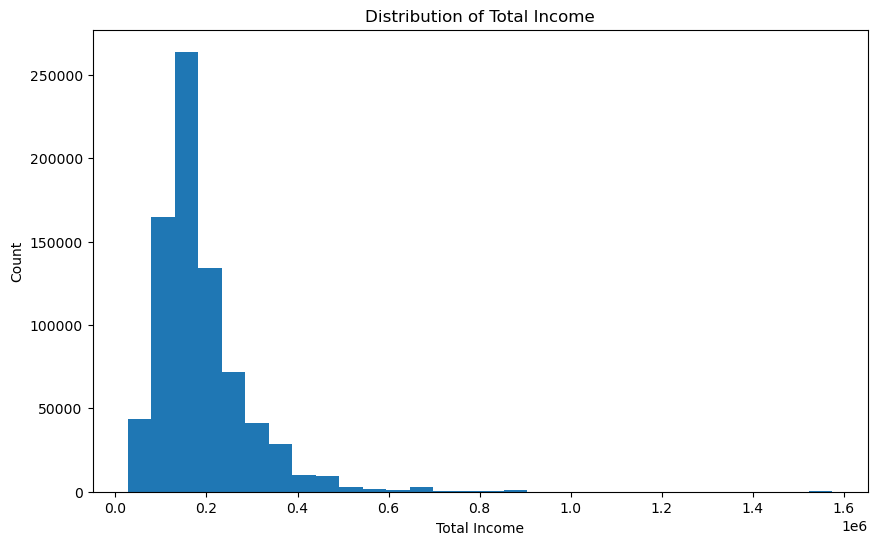

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(data=new_df, x='Total_Income', bins=30)
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Count')
plt.show()

The highest peak of the histogram occurs in the lower income range, suggesting that a significant number of individuals in the dataset have relatively lower total income.

The distribution has a long right tail, indicating the presence of outliers or individuals with higher total income compared to the majority.


### 3.2.2 Bivariate Analysis
> In this section, we are evaluating the relationship between the features columns including our target column `Status`

#### `3.2.2.1 status and income type`

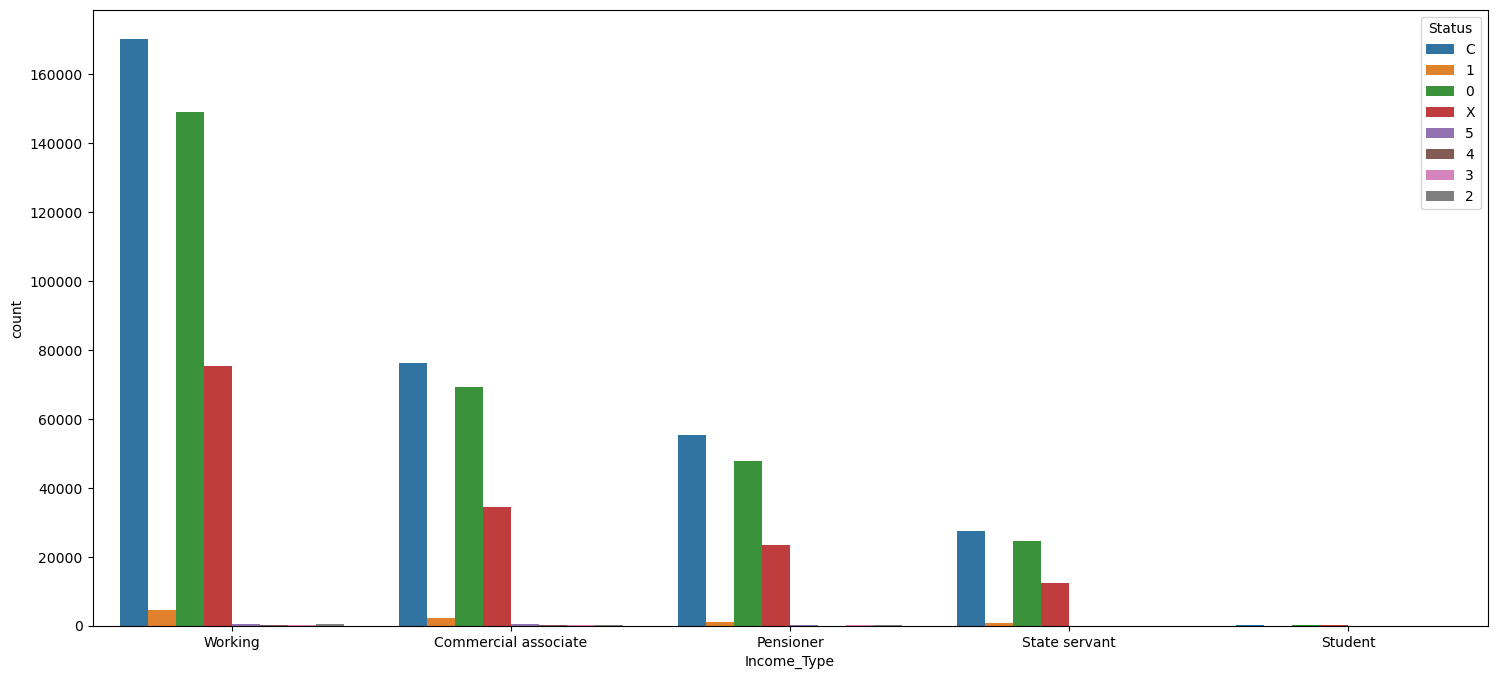

In [56]:
#Comparing status and income type 
plt.figure(figsize=(18,8))
ax = sns.countplot(x='Income_Type', hue="Status", data=new_df)

Employees with a `Working` income type have the highest count across all status categories.

Individuals with `Working`, `Commercial associate` and `Pensioner` income types have a relatively higher proportion in the "Approved" status category compared to other income types.

Individuals with `Student` income type have a very low count and are predominantly in the "Approved" status category.

#### `3.2.2.2 status and property ownership`

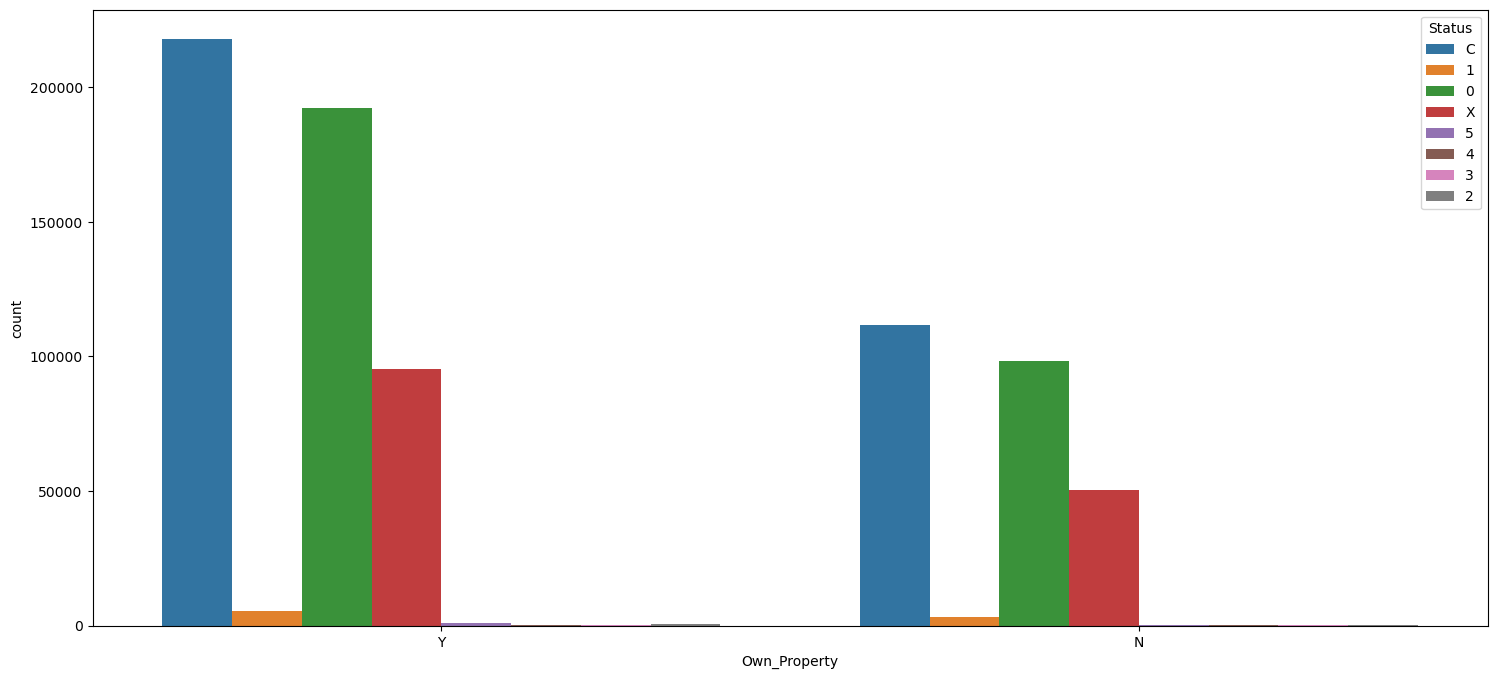

In [57]:
## Comparing status and property ownership
plt.figure(figsize=(18,8))
ax = sns.countplot(x='Own_Property', hue="Status", data=new_df)

Property owners have a higher proportion of individuals in the "Approved" status category compared to the "Denied" category, while non-property owners have a relatively lower proportion in both the "Approved" and "Refused" status categories compared to property owners.

#### `3.2.2.3 status and  Gender`

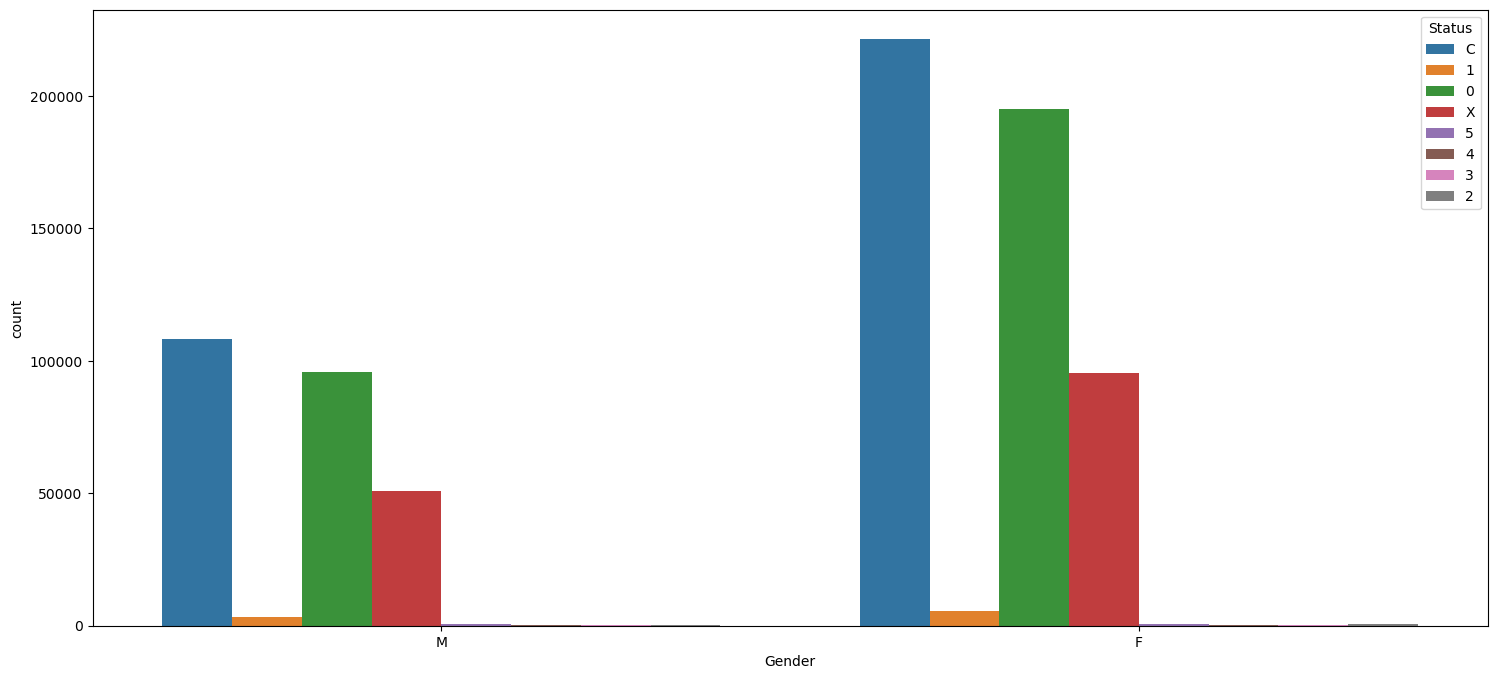

In [58]:
## Comparing status and Gender
plt.figure(figsize=(18,8))
ax = sns.countplot(x='Gender', hue="Status", data=new_df)

The proportion of females in the "Approved" status category is higher compared to males.

### 3.2.3 Multivariate Analysis

In [59]:
# Finding correlation between features using a heatmap
def corrmatrix(df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(10, 5))

    corr = df.corr()

    # Generate a mask to only show the bottom triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # generate heatmap
    sns.heatmap(round(corr,2), annot=True, mask=mask, vmin=-1, vmax=1, cmap='Blues')
    plt.title('Correlation of Features')
    plt.show()

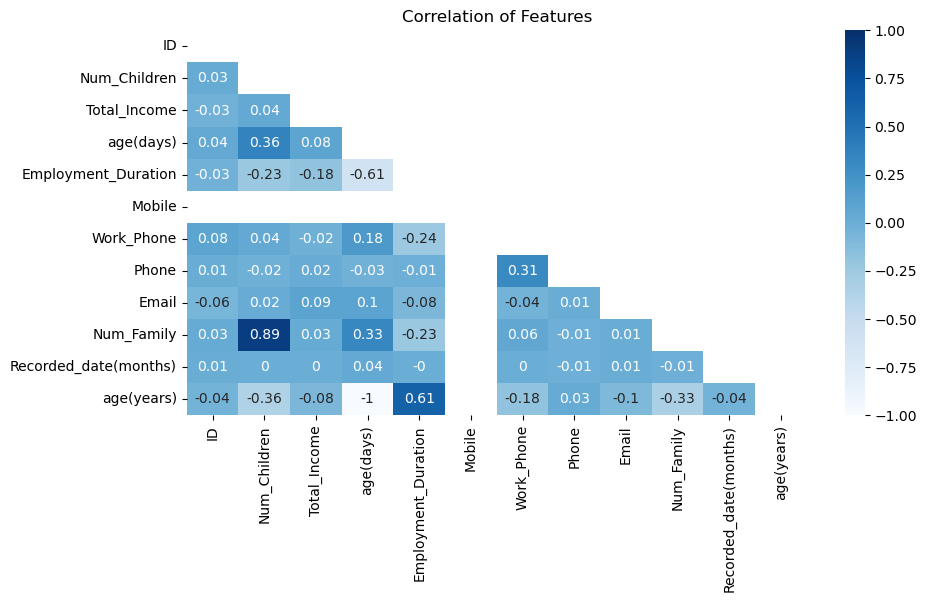

In [60]:
corrmatrix(new_df)

## 3.3. Data Preprocessing
> In this section, we perform various preprocessing steps to prepare the data for modeling and analysis. The preprocessing steps include feature engineering, feature selection, and data encoding.

## 3.3.1 Feature Engineering

> First, we create an approval status column based on the 'Status' column

In [61]:
get_value_counts(new_df, 'ID','Status')

C: 17950
X: 9669
0: 8456
1: 276
5: 76
2: 19
3: 6
4: 5


In [62]:
# mapping the Status into a more readable format

convert_to = {'C' : 'likely_good_debtor', 
              'X' : 'likely_good_debtor',
              '0' : 'Neutral_Debtor', 
              '1' : 'Neutral_Debtor', 
              '2' : 'likely_Bad_Debtor', 
              '3' : 'likely_Bad_Debtor', 
              '4' : 'likely_Bad_Debtor', 
              '5' : 'likely_written_off'}

new_df.replace({'Status' : convert_to}, inplace=True)

get_value_counts(new_df, 'ID','Status')


likely_good_debtor: 27619
Neutral_Debtor: 8732
likely_written_off: 76
likely_Bad_Debtor: 30


> Next, we create a credit record dataframe to better view the statuses of various individuals:

In [63]:
# creating a credit record df to better view the Statuses of various individuals

credit_record = (new_df.value_counts(subset=['ID', 'Status']).unstack(fill_value=0)).reset_index()

# viewing the first five rows

credit_record.head()

Status       ID  Neutral_Debtor  likely_Bad_Debtor  likely_good_debtor  \
0       5008804               2                  0                  14   
1       5008805               2                  0                  13   
2       5008806               7                  0                  23   
3       5008808               2                  0                   3   
4       5008809               0                  0                   5   

Status  likely_written_off  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

> We classify the debtors into subsections of 'Approved' and 'Denied' based on the bank's risk appetite:

In [64]:

def update_credit_approval_status(credit_record):
    conditions = [
        (credit_record['likely_good_debtor'] > credit_record['Neutral_Debtor']),
        (credit_record['likely_good_debtor'] > credit_record['likely_Bad_Debtor']),
        (credit_record['likely_good_debtor'] > credit_record['likely_written_off']),
        (credit_record['Neutral_Debtor'] > credit_record['likely_good_debtor']),
        (credit_record['Neutral_Debtor'] > credit_record['likely_Bad_Debtor']),
        (credit_record['Neutral_Debtor'] > credit_record['likely_written_off']),
        (credit_record['likely_Bad_Debtor'] > credit_record['likely_good_debtor']),
        (credit_record['likely_Bad_Debtor'] > credit_record['Neutral_Debtor']),
        (credit_record['likely_Bad_Debtor'] > credit_record['likely_written_off']),
        (credit_record['likely_written_off'] > credit_record['likely_good_debtor']),
        (credit_record['likely_written_off'] > credit_record['Neutral_Debtor']),
        (credit_record['likely_written_off'] > credit_record['likely_Bad_Debtor'])
    ]
    
    choices = [
        'approved', 'approved', 'approved',
        'Denied', 'Denied', 'Denied',
        'Denied', 'Denied', 'Denied',
        'Denied', 'Denied', 'Denied'
    ]
    
    credit_record['CREDIT_APPROVAL_STATUS'] = pd.Series(
        np.select(conditions, choices, default=''),
        index=credit_record.index
    )
    
    return credit_record


In [65]:
# classifying out debtors

updated_credit_record = update_credit_approval_status(credit_record)


In [66]:
# getting our value counts of the CREDIT_APPROVAL_STATUS


get_value_counts(updated_credit_record, 'ID','CREDIT_APPROVAL_STATUS')


approved: 31384
Denied: 5073


> We merge the new_df and credit_record dataframes based on the 'ID' column and drop any duplicate rows:

In [67]:
# Selecting only the 'ID' and 'CREDIT_APPROVAL_STATUS' columns from the credit_record DataFrame

credit_record = credit_record[['ID', 'CREDIT_APPROVAL_STATUS']]

# Merging the new_df and credit_record DataFrames based on the 'ID' column

Final_data = new_df.merge(credit_record, how='inner', on=['ID'])

# Dropping any duplicate rows based on the 'ID' column in the Final_Credit_data DataFrame

Final_data.drop_duplicates(subset=['ID'], inplace=True)

# Displaying the first few rows of the Final_Credit_data DataFrame

Final_data.head()


ID Gender Own_Car Own_Property  Num_Children  Total_Income  \
0   5008804      M       Y            Y             0      427500.0   
16  5008805      M       Y            Y             0      427500.0   
31  5008806      M       Y            Y             0      112500.0   
61  5008808      F       N            Y             0      270000.0   
66  5008809      F       N            Y             0      270000.0   

             Income_Type   Education_Level   Family_Status       Housing_Type  \
0                Working  Higher education  Civil marriage   Rented apartment   
16               Working  Higher education  Civil marriage   Rented apartment   
31               Working         Secondary         Married  House / apartment   
61  Commercial associate         Secondary          Single  House / apartment   
66  Commercial associate         Secondary          Single  House / apartment   

    ...  Mobile  Work_Phone  Phone  Email      Occupation  Num_Family  \
0   ...       1           1      0      0     unspecified           2   
16  ...       1           1      0      0     unspecified           2   
31  ...       1           0      0      0  Security staff           2   
61  ...       1           0      1      1     Sales staff           1   
66  ...       1           0      1      1     Sales staff           1   

   Recorded_date(months)              Status  age(years)  \
0                      0  likely_good_debtor        33.0   
16                     0  likely_good_debtor        33.0   
31                     0  likely_good_debtor        59.0   
61                     0      Neutral_Debtor        52.0   
66                   -22  likely_good_debtor        52.0   

   CREDIT_APPROVAL_STATUS  
0                approved  
16               approved  
31               approved  
61               approved  
66               approved  

[5 rows x 22 columns]

> Next, we drop some columns not necessary for modeling
1. `Mobile` : everyone has cellphone in our dataset so this column is not needed
2. `Num_children` : Num_Family encapsulates Num_children as well, so going forth we will use Num_family

In [68]:
# dropping the redundant columns

Final_data.drop(['Mobile', 'Num_Children', 'age(days)', 'ID'], axis = 1, inplace= True)


In [69]:
#confirming the new columns
Final_data.columns

Index(['Gender', 'Own_Car', 'Own_Property', 'Total_Income', 'Income_Type',
       'Education_Level', 'Family_Status', 'Housing_Type',
       'Employment_Duration', 'Work_Phone', 'Phone', 'Email', 'Occupation',
       'Num_Family', 'Recorded_date(months)', 'Status', 'age(years)',
       'CREDIT_APPROVAL_STATUS'],
      dtype='object')

> lets explore the `Total_income` column

> For purposes of uniformity, we are going to classify everyone within a range of income

In [70]:
# Set the display format for float values

pd.options.display.float_format = '{:.3f}'.format
Final_data.Total_Income.describe()

count     36457.000
mean     186685.737
std      101789.226
min       27000.000
25%      121500.000
50%      157500.000
75%      225000.000
max     1575000.000
Name: Total_Income, dtype: float64

* the minimum income is `27000`, we can assume that as our minimum cap as set by the bank as to whom qualifies for the credit card application
* Maximum for our data set is `1575000`
* We will create ranges in increments of `27000` hence categorizing income level

In [71]:
#To cater for incomes not in a range of  our dataset

import math
max_income = 1575000
bin_size = 27000

# Calculate the number of bins needed
num_bins = math.ceil(max_income / bin_size)

# Create the bins based on the bin size and number of bins
bins = [bin_size * i for i in range(num_bins + 1)]

# Create a new column 'Income_Range' based on the ranges of 'total_income'
Final_data['Income_Range'] = pd.cut(Final_data['Total_Income'], bins=bins, right=False)

# Map the interval representation to the desired format
Final_data['Income_Range'] = Final_data['Income_Range'].astype(str).str.replace('(', '').str.replace(']', '').str.replace(', ', '-').str.replace(')', '').str.replace('[', '')



In [72]:
# Re-arranging the column

column_to_move = 'Income_Range'  
new_position = 5  

# Pop the column from its current position

column = Final_data.pop(column_to_move)

# Insert the column at the new position

Final_data.insert(new_position, column_to_move, column)

# Print the updated DataFrame

Final_data

Gender Own_Car Own_Property  Total_Income           Income_Type  \
0           M       Y            Y    427500.000               Working   
16          M       Y            Y    427500.000               Working   
31          M       Y            Y    112500.000               Working   
61          F       N            Y    270000.000  Commercial associate   
66          F       N            Y    270000.000  Commercial associate   
...       ...     ...          ...           ...                   ...   
777622      M       Y            Y    315000.000               Working   
777634      F       N            Y    157500.000  Commercial associate   
777658      F       N            Y    157500.000             Pensioner   
777691      F       N            Y    283500.000               Working   
777701      M       N            Y    112500.000               Working   

         Income_Range   Education_Level   Family_Status       Housing_Type  \
0       405000-432000  Higher education  Civil marriage   Rented apartment   
16      405000-432000  Higher education  Civil marriage   Rented apartment   
31      108000-135000         Secondary         Married  House / apartment   
61      270000-297000         Secondary          Single  House / apartment   
66      270000-297000         Secondary          Single  House / apartment   
...               ...               ...             ...                ...   
777622  297000-324000         Secondary         Married  House / apartment   
777634  135000-162000  Higher education         Married  House / apartment   
777658  135000-162000  Higher education         Married  House / apartment   
777691  270000-297000         Secondary         Married  House / apartment   
777701  108000-135000         Secondary          Single   Rented apartment   

        Employment_Duration  Work_Phone  Phone  Email      Occupation  \
0                       -12           1      0      0     unspecified   
16                      -12           1      0      0     unspecified   
31                       -3           0      0      0  Security staff   
61                       -8           0      1      1     Sales staff   
66                       -8           0      1      1     Sales staff   
...                     ...         ...    ...    ...             ...   
777622                   -7           0      0      0        Managers   
777634                   -4           0      1      1  Medicine staff   
777658                   -4           0      1      1  Medicine staff   
777691                   -2           0      0      0     Sales staff   
777701                   -3           0      0      0        Laborers   

        Num_Family  Recorded_date(months)              Status  age(years)  \
0                2                      0  likely_good_debtor      33.000   
16               2                      0  likely_good_debtor      33.000   
31               2                      0  likely_good_debtor      59.000   
61               1                      0      Neutral_Debtor      52.000   
66               1                    -22  likely_good_debtor      52.000   
...            ...                    ...                 ...         ...   
777622           2                      0  likely_written_off      48.000   
777634           2                      0  likely_good_debtor      34.000   
777658           2                      0  likely_good_debtor      34.000   
777691           2                      0   likely_Bad_Debtor      49.000   
777701           1                      0      Neutral_Debtor      25.000   

       CREDIT_APPROVAL_STATUS  
0                    approved  
16                   approved  
31                   approved  
61                   approved  
66                   approved  
...                       ...  
777622               approved  
777634               approved  
777658               approved  
777691                 Denied  
777701                 Deni

> `Recorded_month` is in months, this needs to change to years so that our time related data is standardized

In [73]:
#converting the recorded date into years
Final_data['Recorded_date(months)'] = (Final_data['Recorded_date(months)'] / 12)

In [74]:
# renaming the column

Final_data.rename(columns={'Recorded_date(months)': 'Recorded_date(Years)'}, inplace=True)

Final_data.head()


Gender Own_Car Own_Property  Total_Income           Income_Type  \
0       M       Y            Y    427500.000               Working   
16      M       Y            Y    427500.000               Working   
31      M       Y            Y    112500.000               Working   
61      F       N            Y    270000.000  Commercial associate   
66      F       N            Y    270000.000  Commercial associate   

     Income_Range   Education_Level   Family_Status       Housing_Type  \
0   405000-432000  Higher education  Civil marriage   Rented apartment   
16  405000-432000  Higher education  Civil marriage   Rented apartment   
31  108000-135000         Secondary         Married  House / apartment   
61  270000-297000         Secondary          Single  House / apartment   
66  270000-297000         Secondary          Single  House / apartment   

    Employment_Duration  Work_Phone  Phone  Email      Occupation  Num_Family  \
0                   -12           1      0      0     unspecified           2   
16                  -12           1      0      0     unspecified           2   
31                   -3           0      0      0  Security staff           2   
61                   -8           0      1      1     Sales staff           1   
66                   -8           0      1      1     Sales staff           1   

    Recorded_date(Years)              Status  age(years)  \
0                  0.000  likely_good_debtor      33.000   
16                 0.000  likely_good_debtor      33.000   
31                 0.000  likely_good_debtor      59.000   
61                 0.000      Neutral_Debtor      52.000   
66                -1.833  likely_good_debtor      52.000   

   CREDIT_APPROVAL_STATUS  
0                approved  
16               approved  
31               approved  
61               approved  
66               approved

>> Now we are going to encode and standardize some of our features.

* For this we will use the Label Encoder and StandardScaler since some features have a natural order, and it also caters for those without the natural order

* First we will remove some columns that have been catered for through feature engineering

In [75]:
# creating our model_df 
model_df = Final_data.drop(columns=['Total_Income','Status', 'Recorded_date(Years)','Work_Phone','Phone'],axis =1)


In [76]:
model_df = model_df.sort_values(by='CREDIT_APPROVAL_STATUS', ascending=True)
model_df.head()

Gender Own_Car Own_Property Income_Type   Income_Range Education_Level  \
777701      M       N            Y     Working  108000-135000       Secondary   
665428      F       N            N   Pensioner    54000-81000       Secondary   
665437      F       N            N   Pensioner    54000-81000       Secondary   
123959      F       N            N   Pensioner  270000-297000       Secondary   
123929      M       N            N     Working  108000-135000       Secondary   

       Family_Status       Housing_Type  Employment_Duration  Email  \
777701        Single   Rented apartment                   -3      0   
665428       Married  House / apartment                 1001      0   
665437       Married  House / apartment                 1001      0   
123959         Widow  House / apartment                 1001      0   
123929        Single  House / apartment                   -4      0   

         Occupation  Num_Family  age(years) CREDIT_APPROVAL_STATUS  
777701     Laborers           1      25.000                 Denied  
665428  unspecified           2      59.000                 Denied  
665437  unspecified           2      59.000                 Denied  
123959  unspecified           1      60.000                 Denied  
123929      Drivers           1      28.000                 Denied

In [77]:
model_df['CREDIT_APPROVAL_STATUS'].value_counts()

approved    31384
Denied       5073
Name: CREDIT_APPROVAL_STATUS, dtype: int64

In [78]:
# lets us view our column types one more time before encoding and standardizing

# Get columns with float values

float_columns = model_df.select_dtypes(include=[float]).columns.tolist()

# Get columns with integer values

integer_columns = model_df.select_dtypes(include=[int]).columns.tolist()

# Get columns with object values excluding our target variables

object_columns = model_df.select_dtypes(include=[object]).columns.tolist()
print("Float columns:", float_columns)
print("Integer columns:", integer_columns)
print("Object columns:", object_columns)



Float columns: ['age(years)']
Integer columns: ['Employment_Duration', 'Email', 'Num_Family']
Object columns: ['Gender', 'Own_Car', 'Own_Property', 'Income_Type', 'Income_Range', 'Education_Level', 'Family_Status', 'Housing_Type', 'Occupation', 'CREDIT_APPROVAL_STATUS']


In [79]:
# creating instance for Encoder

encoder = LabelEncoder()

# Iterate over each column and apply LabelEncoder
for column in object_columns:
    model_df[column] = encoder.fit_transform(model_df[column])



## 3.3.2 Feature selection

> To identify the most important features for predicting the credit approval status, we employ Recursive Feature Elimination (RFE) with a Decision Tree Classifier. This technique recursively selects the top features by considering their impact on the model's performance. The selected features are based on their importance in predicting the target variable.

In [80]:
X = model_df.drop(['CREDIT_APPROVAL_STATUS'], axis=1)

y = model_df['CREDIT_APPROVAL_STATUS']

In [81]:
from sklearn.tree import DecisionTreeClassifier

def recursive_feature_elimination(X, y, n_features_to_select):
    """
    Performs Recursive Feature Elimination (RFE) to select the top features for predicting the target variable.
    """
    # Initialize the model and RFE
    model = DecisionTreeClassifier()
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

    # Fit RFE to the data
    rfe.fit(X, y)

    # Retrieve the selected features
    selected_features = X.columns[rfe.support_]

    return selected_features


selected_features = recursive_feature_elimination(X, y, n_features_to_select=11)
print("Selected Features:", selected_features)


Selected Features: Index(['Gender', 'Own_Car', 'Own_Property', 'Income_Type', 'Income_Range',
       'Family_Status', 'Housing_Type', 'Employment_Duration', 'Occupation',
       'Num_Family', 'age(years)'],
      dtype='object')


In [82]:
# Define the columns to include in X
columns_to_include = ['Gender','Own_Car', 'Own_Property', 'Income_Type', 'Income_Range',
       'Family_Status', 'Housing_Type', 'Employment_Duration', 'Occupation',
       'Num_Family', 'age(years)']

# Create the feature matrix X by selecting the desired columns
X = model_df[columns_to_include]
y = model_df['CREDIT_APPROVAL_STATUS']


# 4. Modeling
>In this section, we implement several classification models to predict the target variable, taking into account the class imbalance in the dataset. We start by addressing the class imbalance issue and then proceed with building and evaluating the models.

In [83]:
#Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=42)

## 4.1 Class Imbalance Handling
Before training the models, we address the class imbalance in the dataset. Since the target variable is imbalanced, with a majority class and a minority class, we employ a technique called Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class. SMOTE helps create synthetic samples by interpolating new instances based on the characteristics of existing minority class samples. This approach helps balance the class distribution and improve model performance.

In [84]:
from imblearn.over_sampling import SMOTE
#Instantiate SMOTE
smote = SMOTE()

#Apply SMOTE to oversample the minority class in the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Defining a function to fit a model, predict a target variable for the training and test sets, compute accuracy scores, performs cross-validation, generate a confusion matrix, and print a classification report.

In [85]:
def fit_train_score(model):
    # Start the timer
    start_time = time.time()

    # Fit the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict with X_test
    y_test_pred = model.predict(X_test)

    # Predict with X_train
    y_train_pred = model.predict(X_train)

    # End the timer
    end_time = time.time()

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train_pred, y_train)
    accuracy_test = accuracy_score(y_test_pred, y_test)

    # Perform cross-validation
    cross_val = cross_val_score(model, X_train, y_train, cv=cv)

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Print testing time and accuracy scores
    print(f"Testing time: {elapsed_time} seconds")
    print(f"Model Train accuracy: {accuracy_train:.3f}")
    print(f"Model Test accuracy: {accuracy_test:.3f}")
    print(f"Cross Validation Accuracy: {round(cross_val.mean()*100, 4)}%")

    # Create confusion matrix
    cmatrix = confusion_matrix(y_test, y_test_pred)

    # Plot the Confusion Matrix
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cmatrix, annot=True, fmt='d', cmap='BuPu')

    # Add labels to the x and y axes
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    print('\n')
    print('***********************************', '\n')

    # Print classification report
    print(classification_report(y_test, y_test_pred))

Defining a function that plots the learning curve for a given model. It helps visualize the performance of a model as the training data size increases. The learning curve shows how the training and validation scores change with respect to the number of training examples. It provides insights into model performance, including overfitting or underfitting.

In [86]:
def plot_learning_curve(model):
    # Generate the learning curve using the learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, scoring='accuracy')

    # Calculate the mean and standard deviation of the training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate the mean and standard deviation of the validation scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the training scores and fill the area between the upper and lower bounds
    plt.figure(figsize=(10, 8))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.fill_between(
        train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')

    # Plot the validation scores and fill the area between the upper and lower bounds
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation score')
    plt.fill_between(
        train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

    # Set the x-axis label
    plt.xlabel('Training examples')

    # Set the y-axis label
    plt.ylabel('Score')

    # Add a legend to the plot
    plt.legend(loc='best')

    # Add a grid to the plot
    plt.grid(True)

    # Display the plot
    plt.show()


## 4.2 Decision Tree Classifier(Baseline Model)

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Testing time: 1.3627517223358154 seconds
Model Train accuracy: 0.874
Model Test accuracy: 0.778
Cross Validation Accuracy: 81.8687%


*********************************** 

              precision    recall  f1-score   support

           0       0.28      0.37      0.32      1015
           1       0.89      0.84      0.87      6277

    accuracy                           0.78      7292
   macro avg       0.58      0.61      0.59      7292
weighted avg       0.81      0.78      0.79      7292



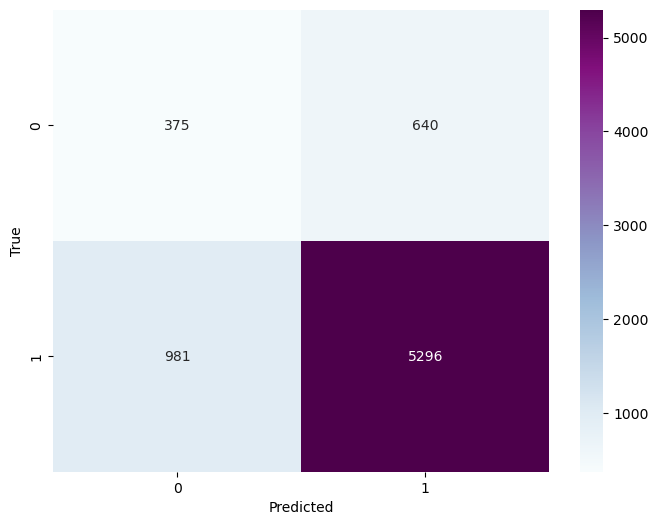

In [93]:
pipeline_dt = Pipeline([('scaler' , StandardScaler()),
                            ('tree', DecisionTreeClassifier())])

# setting basic parameter
grid = [{'tree__criterion': ['entropy'], 
         }]
# Setting the number of cross-validation folds
cv =5
base_decision_tree = GridSearchCV(estimator=pipeline_dt, 
                          param_grid= grid,
                          scoring='accuracy',
                          cv=cv)

fit_train_score(base_decision_tree)

The test accuracy of the model was found to be 77.6%, indicating that it correctly classified approximately 77.6% of the samples in the test set.

When examining the classification report, it was observed that the model achieved a high recall (true positive rate) of 84% for class 1 (positive class), suggesting that it effectively identified the majority of actual positive instances. However, the recall for class 0 (negative class) was found to be relatively lower at 38%, indicating that the model struggled in correctly identifying the actual negative instances.

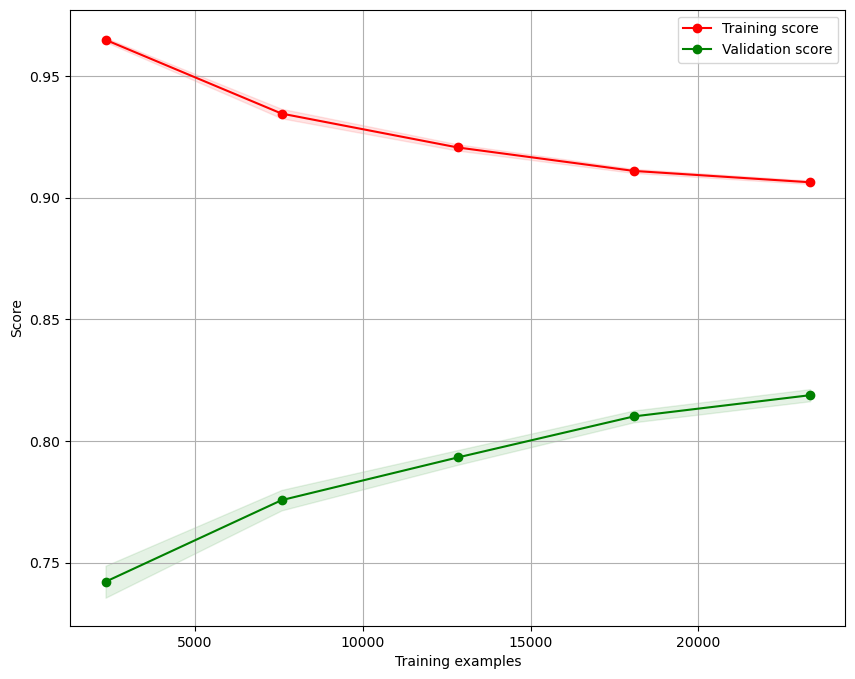

In [94]:
plot_learning_curve(base_decision_tree)

The learning curve plot provided insights into the model's performance, showing that as the number of training examples increased, the validation score improved, indicating better generalization. 

## 4.3 Random Forest Classifier

Testing time: 131.0335295200348 seconds
Model Train accuracy: 0.576
Model Test accuracy: 0.562
Cross Validation Accuracy: 86.0861%


*********************************** 

              precision    recall  f1-score   support

           0       0.15      0.45      0.22      1015
           1       0.87      0.58      0.69      6277

    accuracy                           0.56      7292
   macro avg       0.51      0.52      0.46      7292
weighted avg       0.77      0.56      0.63      7292



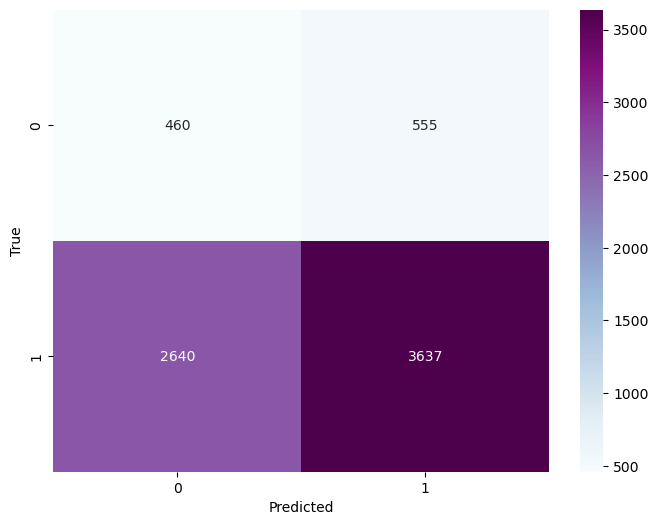

In [95]:
# Defining the pipeline
pipeline_rf = Pipeline([('scaler' , StandardScaler()),
                            ('tree1', RandomForestClassifier()),
                            ])

# Setting the number of cross-validation folds
cv = 5

# Setting the parameter grid for grid search
grid = [{'tree1__n_estimators' : [10, 30, 100],
         'tree1__criterion': ['gini', 'entropy'],
         'tree1__max_depth': [2, 3, 4, 5, 6],
         'tree1__min_samples_split': [len(range(5, 10))],
         'tree1__min_samples_leaf': [len(range(5, 10))]}]

# Setting up the grid search
rf = GridSearchCV(estimator=pipeline_rf,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=cv)

# Training, evaluating, and scoring the model
fit_train_score(rf)

In [96]:
# getting the best parameters of the random tree classifier
rf.best_params_

{'tree1__criterion': 'gini',
 'tree1__max_depth': 6,
 'tree1__min_samples_leaf': 5,
 'tree1__min_samples_split': 5,
 'tree1__n_estimators': 100}

### 4.3.1 Random Forest Classifier with best parameters

Testing time: 13.242827653884888 seconds
Model Train accuracy: 0.579
Model Test accuracy: 0.564
Cross Validation Accuracy: 86.0861%


*********************************** 

              precision    recall  f1-score   support

           0       0.15      0.44      0.22      1015
           1       0.87      0.58      0.70      6277

    accuracy                           0.56      7292
   macro avg       0.51      0.51      0.46      7292
weighted avg       0.77      0.56      0.63      7292



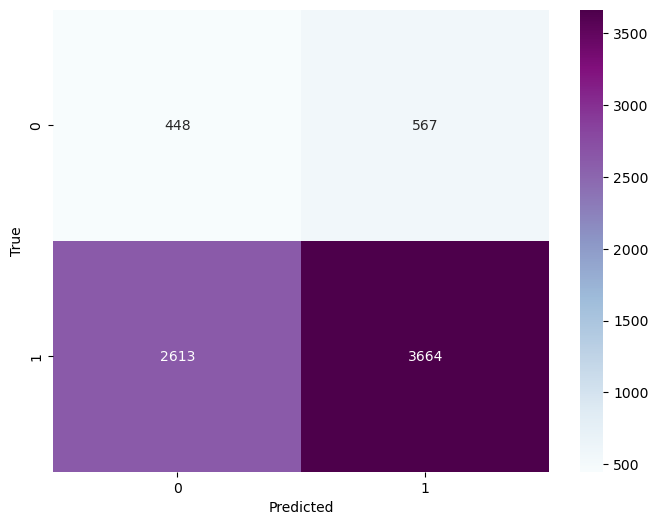

In [97]:
# setting the best parameters for our random tree classifier
grid = [{'tree1__criterion': ['gini'],
 'tree1__max_depth': [6],
 'tree1__min_samples_leaf': [5],
 'tree1__min_samples_split': [5],
 'tree1__n_estimators': [100]}]

# Setting the number of cross-validation folds
cv= 5

# setting the grid search 
random_tuned = GridSearchCV(estimator=pipeline_rf, 
                          param_grid= grid,
                          scoring='accuracy', 
                          cv=cv)

# training and fitting the model
fit_train_score(random_tuned)

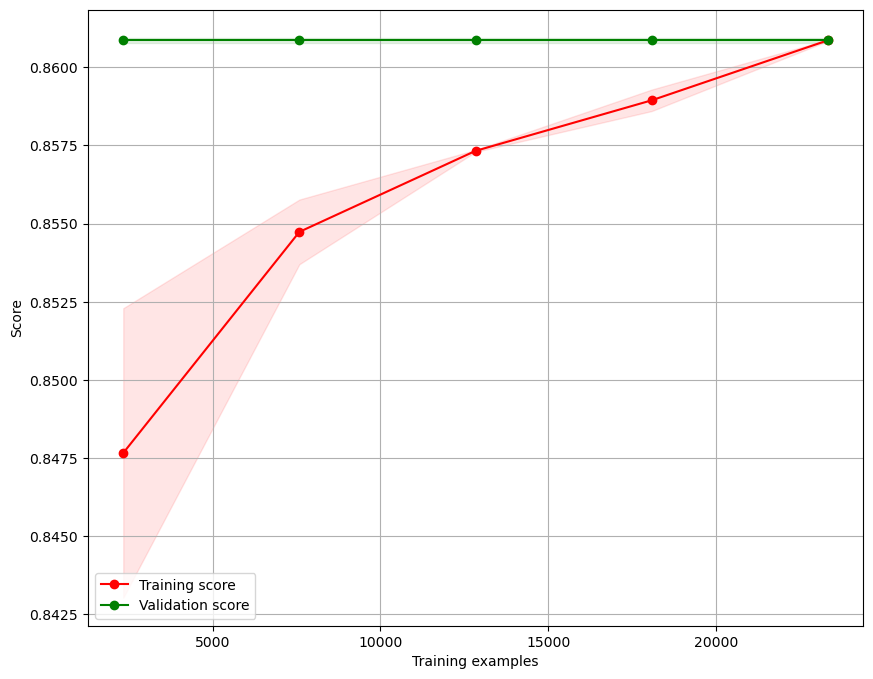

In [98]:
plot_learning_curve(random_tuned)

## 4.4 AdaBoostClassifier

Testing time: 33.75074338912964 seconds
Model Train accuracy: 0.564
Model Test accuracy: 0.554
Cross Validation Accuracy: 86.0758%


*********************************** 

              precision    recall  f1-score   support

           0       0.14      0.45      0.22      1015
           1       0.86      0.57      0.69      6277

    accuracy                           0.55      7292
   macro avg       0.50      0.51      0.45      7292
weighted avg       0.76      0.55      0.62      7292



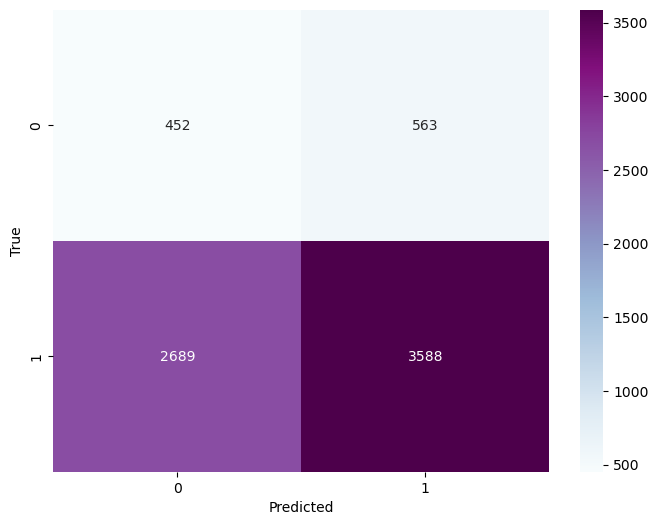

In [99]:
# setting the pipeline
pipeline_ada= Pipeline([('scaler' , StandardScaler()),
                            ('ADA', AdaBoostClassifier())])

# setting basic parameter
ada = [{'ADA__learning_rate': [0.2, 0.3, 0.4, 0.5],
         'ADA__n_estimators': [len(range(1,60))]}]

# Setting the number of cross-validation folds
cv= 5

adaboost = GridSearchCV(estimator=pipeline_ada, 
                          param_grid= ada,
                          scoring='accuracy', 
                          cv=cv)

fit_train_score(adaboost)

In [100]:
adaboost.best_params_

{'ADA__learning_rate': 0.5, 'ADA__n_estimators': 59}

### 4.4.1  AdaBoostClassifier with best parameters

Testing time: 10.139994382858276 seconds
Model Train accuracy: 0.555
Model Test accuracy: 0.550
Cross Validation Accuracy: 86.0758%


*********************************** 

              precision    recall  f1-score   support

           0       0.14      0.45      0.22      1015
           1       0.86      0.57      0.68      6277

    accuracy                           0.55      7292
   macro avg       0.50      0.51      0.45      7292
weighted avg       0.76      0.55      0.62      7292



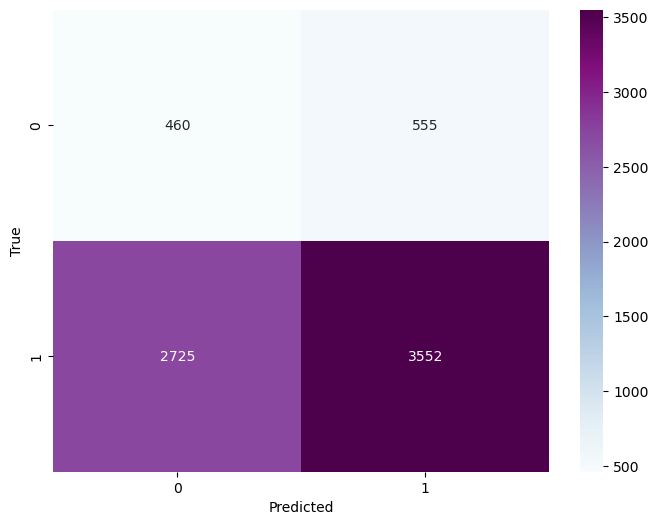

In [101]:
# Defining the best parameters for AdaBoost
ada2 = [{'ADA__learning_rate': [0.2],
         'ADA__n_estimators': [59]}]

# Setting the number of cross-validation folds
cv= 5
# Setting up the grid search with the best parameters for AdaBoost
adaboost_best = GridSearchCV(estimator=pipeline_ada, 
                             param_grid=ada2,
                             scoring='accuracy', 
                             cv=cv)

# Fit, train, and score the model using AdaBoost with the best parameters
fit_train_score(adaboost_best)

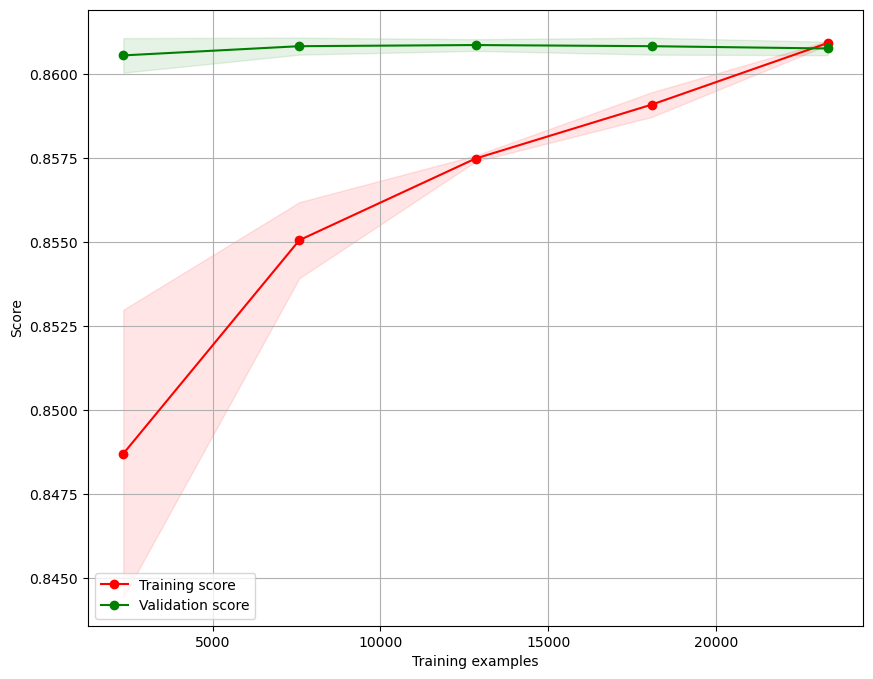

In [102]:
# plotting the learning curve
plot_learning_curve(adaboost_best)


## 4.5 Gradient Boosting

Testing time: 126.49566984176636 seconds
Model Train accuracy: 0.751
Model Test accuracy: 0.730
Cross Validation Accuracy: 86.0826%


*********************************** 

              precision    recall  f1-score   support

           0       0.16      0.23      0.19      1015
           1       0.87      0.81      0.84      6277

    accuracy                           0.73      7292
   macro avg       0.52      0.52      0.52      7292
weighted avg       0.77      0.73      0.75      7292



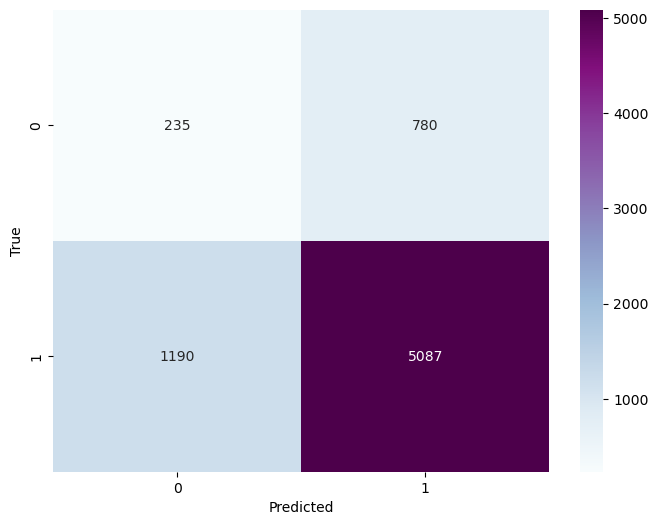

In [103]:
# initializing the pipeline
pipeline_gb = Pipeline([('scaler' , StandardScaler()),
                            ('gradient', GradientBoostingClassifier())])

cv= 5
# setting basic parameter
gradient_grid = [{'gradient__loss' : ['log_loss', 'deviance'],
         'gradient__learning_rate': [0.1, 0.2, 0.3],
         'gradient__n_estimators': [len(range(1,100))],}]

gradientboost = GridSearchCV(estimator=pipeline_gb, 
                          param_grid= gradient_grid,
                          scoring='accuracy', 
                          cv=cv)

fit_train_score(gradientboost)

In [104]:
gradientboost.best_params_

{'gradient__learning_rate': 0.3,
 'gradient__loss': 'log_loss',
 'gradient__n_estimators': 99}

###  4.5.1 Gradient Boosting Classifier with best parameters

Testing time: 23.485981941223145 seconds
Model Train accuracy: 0.751
Model Test accuracy: 0.730
Cross Validation Accuracy: 86.0586%


*********************************** 

              precision    recall  f1-score   support

           0       0.16      0.23      0.19      1015
           1       0.87      0.81      0.84      6277

    accuracy                           0.73      7292
   macro avg       0.52      0.52      0.51      7292
weighted avg       0.77      0.73      0.75      7292



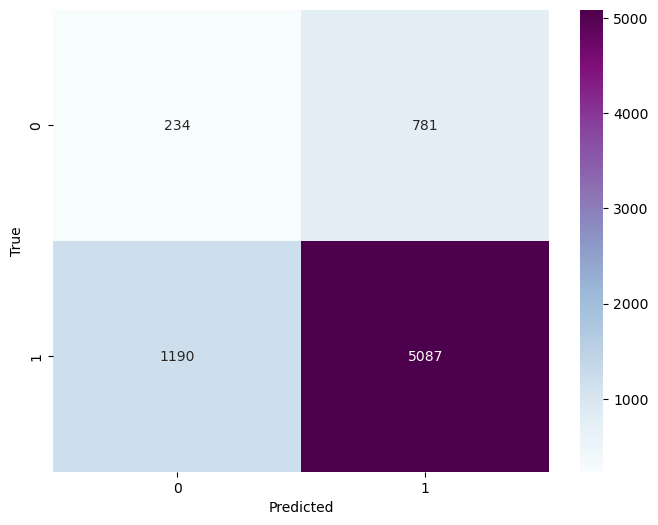

In [105]:
# setting the number of cross-validation folds
cv= 5

# setting best parameters

gradient_2 = [{'gradient__loss' : ['log_loss'],
         'gradient__learning_rate': [0.3],
         'gradient__n_estimators': [99]}]

# setting the grid search

gradient_best = GridSearchCV(estimator=pipeline_gb, 
                          param_grid= gradient_2,
                          scoring='accuracy', 
                          cv=cv)

# fitting and training the model

fit_train_score(gradient_best)

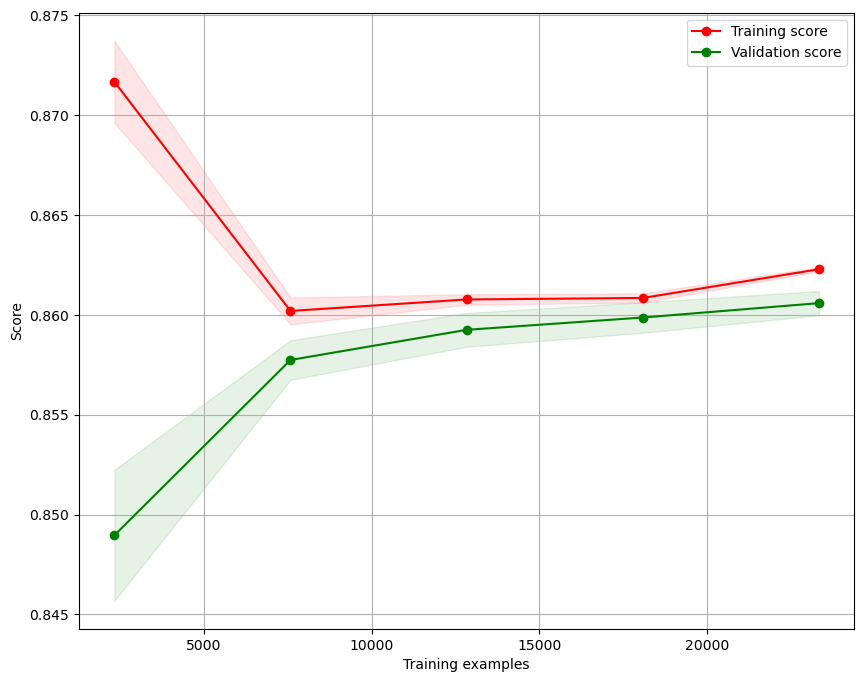

In [106]:
# plotting the learning curve
plot_learning_curve(gradient_best)

Testing time: 198.36610436439514 seconds
Model Train accuracy: 0.842
Model Test accuracy: 0.803
Cross Validation Accuracy: 86.0998%


*********************************** 

              precision    recall  f1-score   support

           0       0.24      0.19      0.21      1015
           1       0.87      0.90      0.89      6277

    accuracy                           0.80      7292
   macro avg       0.56      0.55      0.55      7292
weighted avg       0.79      0.80      0.79      7292



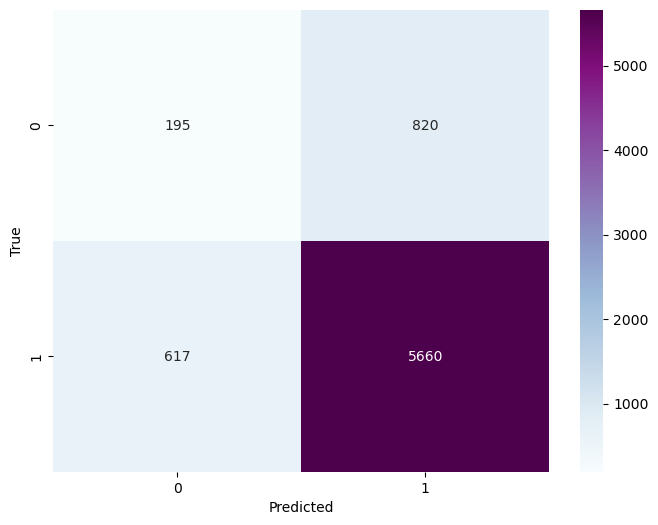

In [107]:
# Importing XGBoost
from xgboost import XGBClassifier

# Defining the pipeline
pipeline_xgb = Pipeline([('scaler', StandardScaler()),
                         ('xgb', XGBClassifier())])

# Setting the number of cross-validation folds
cv = 5

# Defining the parameter grid for XGBoost
xgb_grid = [{'xgb__learning_rate': [0.1, 0.2, 0.3],
             'xgb__max_depth': [3, 4, 5],
             'xgb__n_estimators': [50, 100, 150]}]

# Setting up the grid search for XGBoost
xgb= GridSearchCV(estimator=pipeline_xgb,
                          param_grid=xgb_grid,
                          scoring='accuracy',
                          cv=cv)

# Fitting, training, and scoring the model using XGBoost
fit_train_score(xgb)


In [108]:
xgb.best_params_

{'xgb__learning_rate': 0.3, 'xgb__max_depth': 5, 'xgb__n_estimators': 150}

Testing time: 16.375995635986328 seconds
Model Train accuracy: 0.842
Model Test accuracy: 0.803
Cross Validation Accuracy: 86.0929%


*********************************** 

              precision    recall  f1-score   support

           0       0.24      0.19      0.21      1015
           1       0.87      0.90      0.89      6277

    accuracy                           0.80      7292
   macro avg       0.56      0.55      0.55      7292
weighted avg       0.79      0.80      0.79      7292



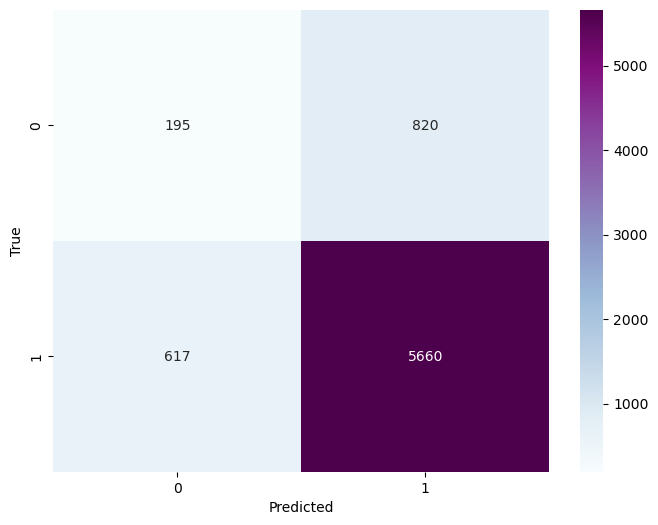

In [109]:
#Setting the number of cross-validation folds
cv = 5
# Setting best parameters
xgb_2 = [{'xgb__learning_rate': [0.3],
          'xgb__max_depth': [5],
          'xgb__n_estimators': [150]}]

# Setting the grid search
xgb_best = GridSearchCV(estimator=pipeline_xgb, 
                        param_grid=xgb_2,
                        scoring='accuracy', 
                        cv=cv)

# Fitting and training the model
fit_train_score(xgb_best)


### Finding the best model, and incorporation shap values for recommendation purposes

Testing time: 46.92899751663208 seconds
Model Train accuracy: 0.874
Model Test accuracy: 0.775
Cross Validation Accuracy: 82.4927%


*********************************** 

              precision    recall  f1-score   support

           0       0.27      0.36      0.31      1015
           1       0.89      0.84      0.87      6277

    accuracy                           0.78      7292
   macro avg       0.58      0.60      0.59      7292
weighted avg       0.80      0.78      0.79      7292



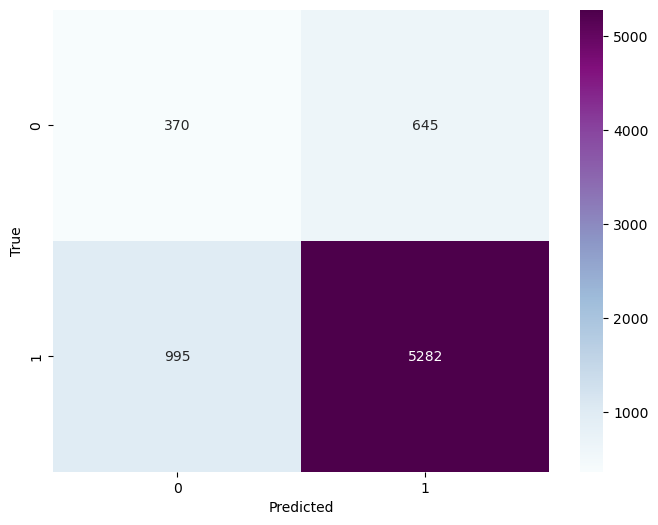

In [110]:

scaled_pipeline = Pipeline([('scaler' , StandardScaler()),
                            ('tree', DecisionTreeClassifier())])

# setting basic parameter
grid = [{'tree__criterion': ['entropy', 'gini', 'log_loss'], 
         'tree__splitter': ['best','random'],
           'tree__random_state' :[10,15,42],
           'tree__max_features': ['auto', 'sqrt', 'log2']}]

cv =10
base_decision_tree1 = GridSearchCV(estimator=scaled_pipeline, 
                          param_grid= grid,
                          scoring='accuracy',
                          cv=cv)

fit_train_score(base_decision_tree1)

In [111]:
base_decision_tree1.best_params_

{'tree__criterion': 'gini',
 'tree__max_features': 'auto',
 'tree__random_state': 15,
 'tree__splitter': 'best'}

In [112]:
# doing the train test split
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=5)

X_train_resampled,y_train_resampled = smote.fit_resample(X_train, y_train)


scaled_pipeline2 = Pipeline([('scaler' , StandardScaler()),
                            ('tree', DecisionTreeClassifier())])

grid = [{'tree__criterion': ['gini'], 
         'tree__splitter': ['best'],
           'tree__random_state' :[15],
           'tree__max_features': ['auto']}]

cv =10
base_decision_tree1 = GridSearchCV(estimator=scaled_pipeline2, 
                          param_grid= grid,
                          scoring='accuracy',
                          cv=cv)

final_model = base_decision_tree1.fit(X_train_resampled,y_train_resampled)



y_test_pred = final_model.predict(X_test)

# accuracy score of the model on the training set.

y_train_pred = final_model.predict(X_train)

accuracy_train = accuracy_score(y_train_pred,y_train)



  # the accuracy score of the model on the test set.

accuracy_test = accuracy_score(y_test_pred, y_test)

print(f'Model Train accuracy: {accuracy_train:.3f}')
print(f'Model Test accuracy: {accuracy_test:.3f}')


Model Train accuracy: 0.870
Model Test accuracy: 0.785


In [113]:
import shap

# Create an explainer object using the best model
explainer = shap.Explainer(best_model.named_steps['tree'])

# Compute the SHAP values for the test data
shap_values = explainer.shap_values(X_train)

shap_values = np.concatenate(shap_values, axis=0)

# Convert the SHAP values into a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

# Iterate over each feature and its corresponding SHAP values
for feature in shap_df.columns:
    shap_value_mean = shap_df[feature].mean()
    shap_value_std = shap_df[feature].std()
    print(f"{feature}: {shap_value_mean:.4f} (SHAP value: {shap_value_std:.4f})")

NameError: name 'best_model' is not defined

In [ ]:
import shap

def compute_shap_values(model, X_train):
    # Create an explainer object using the best model
    explainer = shap.Explainer(model.named_steps['tree'])

    # Compute the SHAP values for the training data
    shap_values = explainer.shap_values(X_train)

    shap_values = np.concatenate(shap_values, axis=0)

    # Convert the SHAP values into a DataFrame
    shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

    # Iterate over each feature and its corresponding SHAP values
    for feature in shap_df.columns:
        shap_value_mean = shap_df[feature].mean()
        shap_value_std = shap_df[feature].std()
        print(f"{feature}: {shap_value_mean:.4f} (SHAP value: {shap_value_std:.4f})")
    
    # Display the summary plot
    shap.summary_plot(shap_values, X_train)


In [ ]:
final_model.predict(X_test.iloc[[600]])

In [ ]:
import numpy as np
import pandas as pd
import shap

def compute_shap_values(model, test_instance):
    # Get the best estimator from the GridSearchCV object
    best_estimator = model.best_estimator_

    # Create an explainer object using the best estimator
    explainer = shap.Explainer(best_estimator.named_steps['tree'])

    # Compute the SHAP values for the test instance
    shap_values = explainer.shap_values(test_instance)

    # Reshape the SHAP values array
    shap_values = np.squeeze(shap_values)

    # Convert the SHAP values into a DataFrame
    shap_df = pd.DataFrame(shap_values, columns=test_instance.columns)

    # Iterate over each feature and its corresponding SHAP values
    for feature in shap_df.columns:
        shap_value_mean = shap_df[feature].mean()
        shap_value_std = shap_df[feature].std()
        print(f"{feature}: {shap_value_mean:.4f} (SHAP value: {shap_value_std:.4f})")


# Example usage
# compute_shap_values(final_model, X_train.iloc[[300]])


In [ ]:
import pandas as pd

# Create a new DataFrame with the unencoded values for the dummy test
dummy_test = pd.DataFrame({
    'Own_Car': ['N'],
    'Own_Property': ['Y'],
    'Income_Type': ['Working'],
    'Income_Range': ['405000-432000'],
    'Family_Status': ['Civil marriage'],
    'Housing_Type': ['Rented apartment'],
    'Employment_Duration': [-12],
    'Occupation': ['Sales staff'],
    'Num_Family': [1],
    'age(years)': [33.000]
})
categorical_columns = ['Own_Car', 'Own_Property', 'Income_Range','Income_Type','Employment_Duration', 'Family_Status', 'Housing_Type', 'Occupation','age(years)']

# Apply the same preprocessing steps to the dummy test data as you did on the training data
for column in categorical_columns:
    dummy_test[column] = encoder.fit_transform(dummy_test[column])
    
# Perform the dummy test using the final_model
#y_dummy_pred = final_model.predict(dummy_test_scaled)

# Print the predicted values
#print(y_dummy_pred)
prediction = final_model.predict(dummy_test)[0]


# Print the prediction
# Print the prediction
if prediction == 1:
    print("Approved!")
else:
    print("Denied!")

print("Reasons:",)
shap_values_instance = compute_shap_values(final_model, dummy_test)

